In [ ]:
!pip install session_info pyjanitor lime shap==0.44.1 astroid pylint ipython matplotlib==3.7.3 scikit-learn==1.1.2

In [ ]:
# Iniciales
import pandas as pd
import numpy as np
import time
import session_info

#Preprocesamiento
import janitor
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder


#Modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

#Metricas
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score,  roc_curve, auc, accuracy_score, classification_report, make_scorer, recall_score


#Lime y Shap
from lime.lime_tabular import LimeTabularExplainer
import shap


#Visualización
from IPython.display import Image, display, HTML
import matplotlib.pyplot as plt
import seaborn as sns



#Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install matplotlib==3.7.3

### ***Configuraciones generales***

In [ ]:
plt.style.use('seaborn-whitegrid')

sns.set(
palette='Set2',
style = 'whitegrid'
)

In [ ]:
# session_info.show()

### Descripción de variables:

- customerID : ID único que identifica a cada cliente.
- gender: El género del cliente: Masculino, Femenino
- SeniorCitizen: Indica si el cliente tiene 65 años o más: Sí, No
- Partner: Indica si es socio o no.
- Dependents: Indica si el cliente vive con alguna persona a su cargo: Sí, No. Las personas a cargo pueden ser hijos, padres, abuelos, etc.
- tenure: Indica el número total de meses que el cliente lleva con la empresa al final del trimestre.
- PhoneService: Indica si el cliente está suscrito a un servicio telefónico nacional con la compañía: Sí, No
- MultipleLines: Indica si el cliente tiene suscritas varias líneas telefónicas con la compañía: Sí, No
- InternetService:Indica si el cliente tiene contratado el servicio de Internet con la compañía: No, ADSL, Fibra Óptica, Cable.
- OnlineSecurity: Indica si el cliente está suscrito a un servicio adicional de seguridad en línea proporcionado por la empresa: Sí, No
- DeviceProtection: Indica si el cliente suscribe un plan adicional de protección de dispositivos para sus equipos de Internet proporcionado por la compañía: Sí, No
- TechSupport: Indica si el cliente suscribe soporte técnico
- StreamingTV: Indica si el cliente utiliza su servicio de Internet para transmitir programación de televisión de un tercer proveedor: Sí, No. La empresa no cobra una cuota adicional por este servicio.
- StreamingMovies: Indica si el cliente utiliza su servicio de Internet para transmitir películas de un proveedor externo: Sí, No. La empresa no cobra una tarifa adicional por este servicio.
- Contract: Indica el tipo de contrato actual del cliente: Mes a mes, Un año, Dos años.
- PaperlessBilling: Indica si el cliente ha elegido la facturación sin papel: Sí, No
- PaymentMethod: Indica cómo paga el cliente su factura: Retiro bancario, Tarjeta de crédito, Cheque enviado por correo
- MonthlyCharges: Indica el cargo mensual total actual del cliente por todos sus servicios de la empresa.
- TotalCharges: Indica los gastos totales del cliente, calculados hasta el final del trimestre especificado anteriormente
- Churn:  Yes = el cliente abandonó la empresa este trimestre. No = el cliente permaneció en la empresa
- Fuente de los datos: https://www.kaggle.com/datasets/blastchar/telco-customer-churn


### Carga de los datos

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

### Preprocesamiento de los datos

In [ ]:
#limpieza de nombre de columnas
df = df.clean_names()

In [ ]:
#Dimensiones del dataframe
df.shape

(7043, 21)

In [ ]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [ ]:
#features por tipo

categorical_features = ['gender', 'seniorcitizen', 'partner', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'dependents']
numerical_features = ['tenure', 'monthlycharges',  'totalcharges']
target = ['churn']

In [ ]:
l2 = ['gender', 'partner', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'dependents']
for i in l2:
    df[i] =  df[i].str.lower()

### Verificación de valores unicos para variables categóricas

In [ ]:
for i in categorical_features:
    print(i)
    print (df[i].unique())
    print('---'*60)

gender
['female' 'male']
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
seniorcitizen
[0 1]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
partner
['yes' 'no']
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
phoneservice
['no' 'yes']
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
multiplelines
['no phone service' 'no' 'yes']
------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
for i in numerical_features:
    print(i)
    print (df[i].unique())
    print('---'*60)

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
monthlycharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
totalcharges
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
#Verificacion de los nulos en las columnas
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [ ]:
# Cantidad y porcentaje de la variable target
cantidad = df['churn'].value_counts()
porcentaje =  df['churn'].value_counts(normalize=True)*100
df_target = pd.DataFrame({'cantidad':cantidad, 'porcentaje (%)':porcentaje})
df_target

cantidad  porcentaje (%)
churn                          
No         5174       73.463013
Yes        1869       26.536987

In [ ]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

# EDA

Variables categoricas

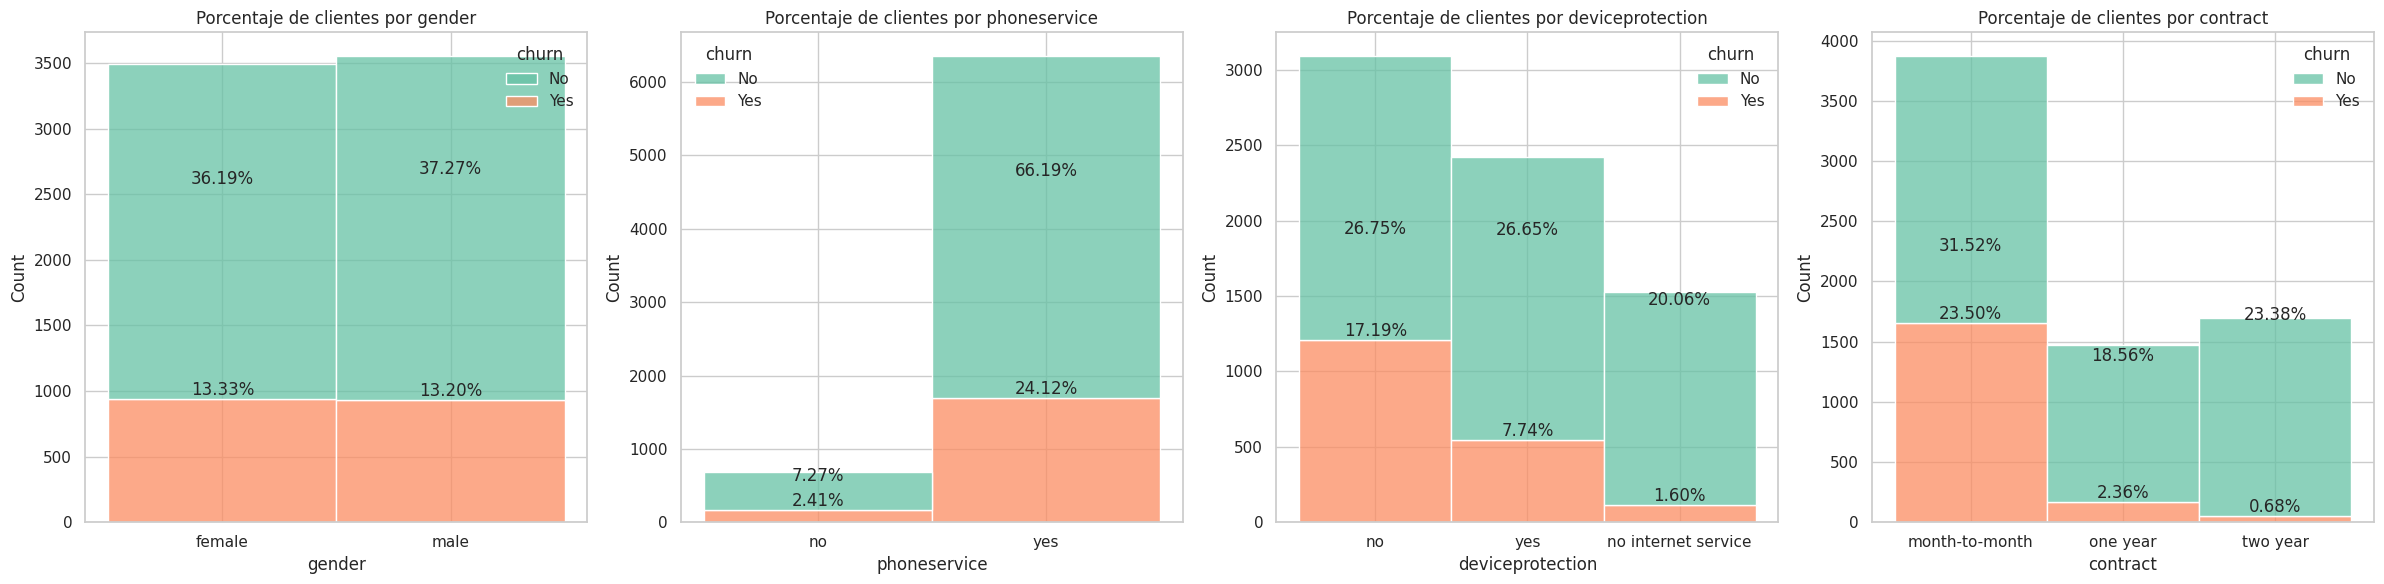

In [ ]:
select = ['gender', 'phoneservice',  'deviceprotection', 'contract']

fig, axes = plt.subplots(1, 4, figsize=(24, 6))

for ax, feature in zip(axes, select):

    #sns.countplot(data=df, x=feature, hue = 'churn', ax=ax)
    sns.histplot(data=df, x=feature, hue = 'churn', ax=ax, multiple='stack')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height/len(df)*100:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    ax.set_title(f'Porcentaje de clientes por {feature}', fontsize=12)

plt.tight_layout()
plt.show();

Variables numericas

In [ ]:
df[numerical_features].describe()

tenure  monthlycharges  totalcharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000

In [ ]:
def histogramas3(df, columna1, columna2, columna3, hue, bins=10, palette='Set2'):
    """
    Crea tres histogramas lado a lado usando Seaborn.

    Parámetros:
    - df: pandas.DataFrame que contiene los datos.
    - columna1, columna2, columna3: nombres de las columnas del DataFrame para los histogramas.
    - bins: número de bins para los histogramas (opcional).
    - color1, color2, color3: colores de los histogramas (opcional).
    """

    colores = sns.color_palette(palette, n_colors=3)
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    sns.histplot(data=df, x=columna1, bins=bins, hue=hue, color=colores[0], ax=axes[0])
    axes[0].set_title(f'Histograma de {columna1}')
    axes[0].set_xlabel(columna1)
    axes[0].set_ylabel('Frecuencia')


    sns.histplot(data=df, x=columna2, bins=bins, hue=hue, color=colores[1], ax=axes[1])
    axes[1].set_title(f'Histograma de {columna2}')
    axes[1].set_xlabel(columna2)
    axes[1].set_ylabel('Frecuencia')


    sns.histplot(data=df, x=columna3, bins=bins, hue= hue, color=colores[2], ax=axes[2])
    axes[2].set_title(f'Histograma de {columna3}')
    axes[2].set_xlabel(columna3)
    axes[2].set_ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()


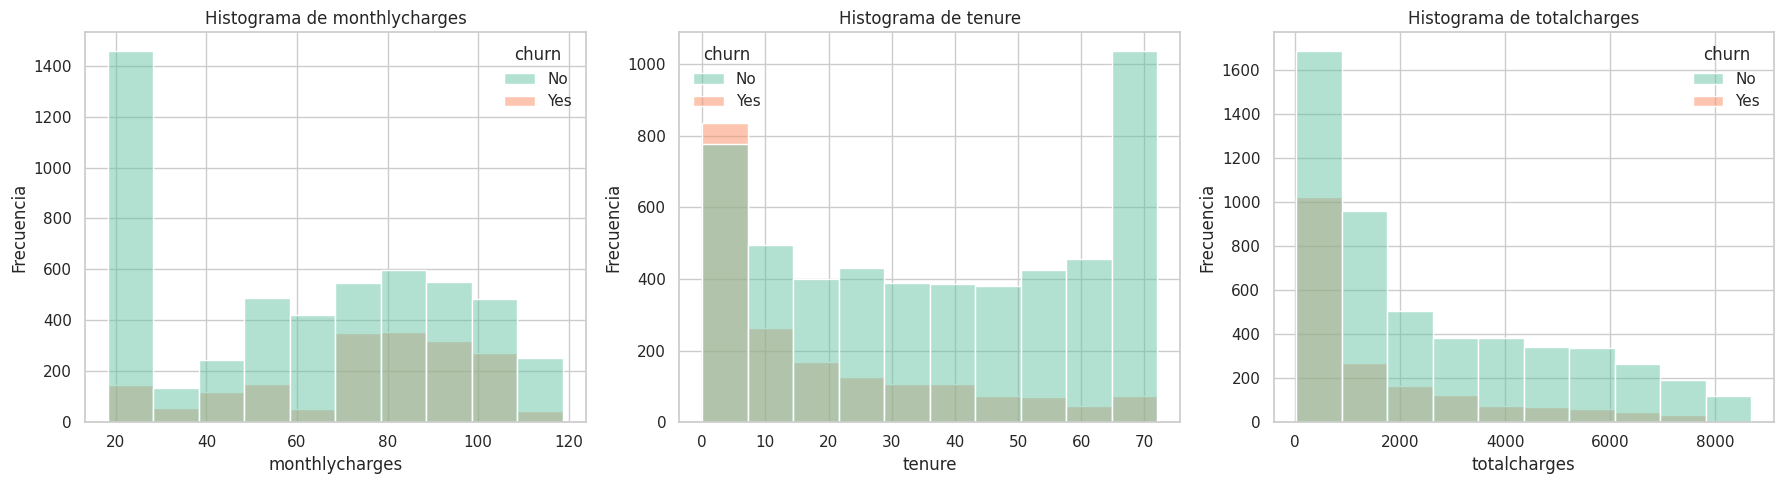

In [ ]:
histogramas3(df, 'monthlycharges', 'tenure', 'totalcharges', 'churn' )

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

customerid  gender  seniorcitizen partner dependents  tenure phoneservice  \
0  7590-VHVEG  female              0     yes         no       1           no   
1  5575-GNVDE    male              0      no         no      34          yes   
2  3668-QPYBK    male              0      no         no       2          yes   
3  7795-CFOCW    male              0      no         no      45           no   
4  9237-HQITU  female              0      no         no       2          yes   

      multiplelines internetservice onlinesecurity  ... deviceprotection  \
0  no phone service             dsl             no  ...               no   
1                no             dsl            yes  ...              yes   
2                no             dsl            yes  ...               no   
3  no phone service             dsl            yes  ...              yes   
4                no     fiber optic             no  ...               no   

  techsupport streamingtv streamingmovies        contract paperlessbilling  \
0          no          no              no  month-to-month              yes   
1          no          no              no        one year               no   
2          no          no              no  month-to-month              yes   
3         yes          no              no        one year               no   
4          no          no              no  month-to-month              yes   

               paymentmethod monthlycharges  totalcharges  churn  
0           electronic check          29.85         29.85     No  
1               mailed check          56.95       1889.50     No  
2               mailed check          53.85        108.15    Yes  
3  bank transfer (automatic)          42.30       1840.75     No  
4           electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [ ]:
df['churn'] = df['churn'].replace({'Yes' : 1, 'No' : 0})

In [ ]:
target

['churn']

In [ ]:
#df[numerical_features] = df[numerical_features].replace(' ', np.nan)
#df[numerical_features]  = df[numerical_features].fillna(0)
df[numerical_features]  = df[numerical_features].fillna(df['totalcharges'].median())

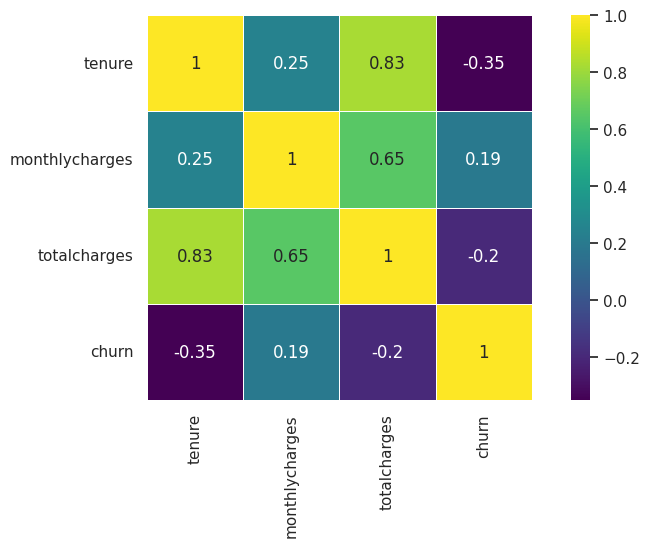

In [ ]:
# Análisis de correlaciones entre features y target
correlation_matrix = df[numerical_features+target].corr()
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(correlation_matrix, annot= True , cmap = 'viridis', linewidths = 0.5, linecolor = 'white', square=True)
plt.show()

# Entrenamiento

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df = df.clean_names()

In [ ]:
df['churn'] = df['churn'].replace({'Yes' : 1, 'No' : 0})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis=1), df[target], random_state=42, test_size=0.2)

In [ ]:
# Supongamos que df es tu DataFrame y categorical_features es la lista de columnas categóricas

# Limpiar valores vacíos o no numéricos en las columnas numéricas
for column in ['tenure', 'monthlycharges', 'totalcharges']:
    #X_train[column] = X_train[column].replace(' ', pd.NA)
    X_train[column] = X_train[column].replace(' ', np.nan)
    X_train[column] = pd.to_numeric(X_train[column], errors='coerce')
    #X_train[column] = X_train[column].fillna(0)
    X_train[column] = X_train[column].fillna(X_train[column].median())



# Escalado de características numéricas
scaler = StandardScaler()
X_train[['tenure', 'monthlycharges', 'totalcharges']] = scaler.fit_transform(X_train[['tenure', 'monthlycharges', 'totalcharges']])



# Codificación One-Hot para las columnas categóricas
one_hot_encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown =  'ignore')
encoded_features = one_hot_encoder.fit_transform(X_train[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(categorical_features))

# Concatenar las nuevas columnas codificadas con el DataFrame original
X_train = pd.concat([X_train.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Eliminar las columnas categóricas originales del DataFrame
X_train.drop(columns=categorical_features, inplace=True)

# Establecer 'customerID' como índice
X_train.set_index('customerid', inplace=True)

In [ ]:
# Limpiar valores vacíos o no numéricos en las columnas numéricas de X_test

for column in ['tenure', 'monthlycharges', 'totalcharges']:
    X_test[column] = X_test[column].replace(' ', pd.NA)
    X_test[column] = pd.to_numeric(X_test[column], errors='coerce')
    #X_test[column] = X_test[column].fillna(0)
    X_test[column] = X_test[column].fillna(X_test[column].median())


# Escalado de características numéricas en X_test
X_test[['tenure', 'monthlycharges', 'totalcharges']] = scaler.transform(X_test[['tenure', 'monthlycharges', 'totalcharges']])


# Codificación One-Hot para las columnas categóricas en X_test
encoded_features_test = one_hot_encoder.transform(X_test[categorical_features])
encoded_df_test = pd.DataFrame(encoded_features_test, columns=one_hot_encoder.get_feature_names_out(categorical_features))

# Concatenar las nuevas columnas codificadas con el DataFrame original X_test
X_test = pd.concat([X_test.reset_index(drop=True), encoded_df_test.reset_index(drop=True)], axis=1)

# Eliminar las columnas categóricas originales del DataFrame X_test
X_test.drop(columns=categorical_features, inplace=True)

# Establecer 'customerID' como índice en X_test
X_test.set_index('customerid', inplace=True)

In [ ]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [ ]:
X_train.shape

(5634, 30)

In [ ]:
X_test.shape

(1409, 30)

### Métricas

In [ ]:
def evalBinaryClassifier(model, x, y, labels=['Positivos','Negativos']):
    """
    Define una lista de modelos de machine learning para entrenar.

    Parameters:
    - model : Modelo a evaluar
    - x : valores de x
    - y : valores de y

    Returns:
    - Fig1: Matriz de confusión.
    - Fig2: Distribución de las predicciones
    - Fig3: Curva ROC

    """

    #1 Calculo de probabilidad
    p = model.predict_proba(x)
    if len(model.classes_)!=2:
        raise ValueError('Se requiere un problema')
    if model.classes_[1] == 1:
        pos_p = p[:,1]
    elif model.classes_[0] == 1:
        pos_p = p[:,0]


    plt.figure(figsize=[15,4])

    #1 Matriz de confusión

    cm = confusion_matrix(y,model.predict(x))
    plt.subplot(131)
    ax = sns.heatmap(cm, annot=True, cmap='Set2', cbar=False,
                annot_kws={"size": 14}, fmt='g')
    plt.title('Matriz de confusión', size=15)
    plt.xlabel('Valores predichos', size=13)
    plt.ylabel('Valores verdaderos', size=13)

    #2 Distribución de las clases de probabilidad

    df= pd.DataFrame({
            'probPos': pos_p,
            'target': y

        })


    plt.subplot(132)
    plt.hist(df[df.target==1].probPos, density=True, bins=25,
             alpha=.5, color='green',  label=labels[0])
    plt.hist(df[df.target==0].probPos, density=True, bins=25,
             alpha=.5, color='red', label=labels[1])
    plt.axvline(.5, color='blue', linestyle='--', label='Límite')
    plt.xlim([0,1])
    plt.title('Distribución de las predicciones', size=15)

    plt.xlabel('Probabilidad', size=13)
    plt.ylabel('Muestras', size=13)
    plt.legend(loc="upper right")


    #3 Curva ROC

    fp_rates, tp_rates, _ = roc_curve(y,p[:,1])
    roc_auc = auc(fp_rates, tp_rates)
    plt.subplot(133)
    plt.plot(fp_rates, tp_rates, color='green',
             lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], lw=1, linestyle='--', color='grey')



    #4 Punto de decisión

    tn, fp, fn, tp = [i for i in cm.ravel()]
    plt.plot(fp/(fp+tn), tp/(tp+fn), 'bo', markersize=8, label='Punto de decisión')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de falsos positivos', size=13)
    plt.ylabel('Tasa de verdaderos positivos', size=13)
    plt.title('Curva ROC', size=15)
    plt.legend(loc="lower right")
    plt.subplots_adjust(wspace=.3)
    plt.show()
    #Print and Return the F1 score
    tn, fp, fn, tp = [i for i in cm.ravel()]
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2*(precision * recall) / (precision + recall)
    printout = (
        f'Precision: {round(precision,2)} | '
        f'Recall: {round(recall,2)} | '
        f'F1 Score: {round(F1,2)} | '
    )
    print(printout)
    return F1

In [ ]:
# Inicializar la lista de resultados
model_results = []

# Definir la función de entrenamiento y evaluación
def train_and_evaluate(model):
    start = time.time()

    model.fit(X_train, y_train)

    elapsed_time = time.time() - start
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    result = {
        "model_name": type(model).__name__,
        "train_score": train_score,
        "test_score": test_score,
        "training_time": elapsed_time,
        "pipeline": None  # Ajustar según sea necesario
    }
    return result

#Lista de modelos a evaluar
model_list = [
    GaussianNB(),
    LogisticRegressionCV(),
    RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5),
    MLPClassifier(solver='adam', alpha=0.1, hidden_layer_sizes=(10, 10, 5, 2), max_iter=500, random_state=42)
]

#Evaluar cada modelo
for model in model_list:
    result = train_and_evaluate(model)
    model_results.append(result)



### ***GaussianNB***

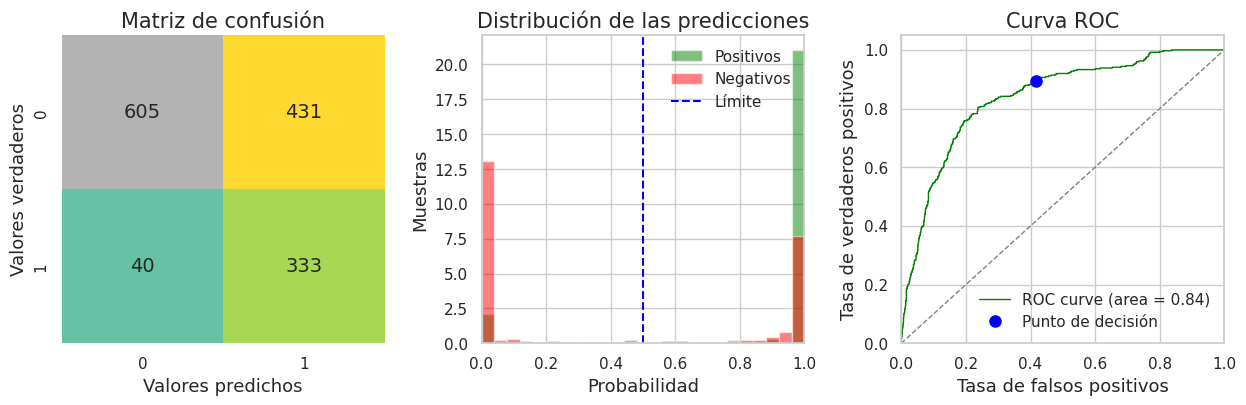

Precision: 0.44 | Recall: 0.89 | F1 Score: 0.59 | 


0.5857519788918205

In [ ]:
evalBinaryClassifier(model_list[0], X_test, y_test)

### ***RandomForestClassifier***

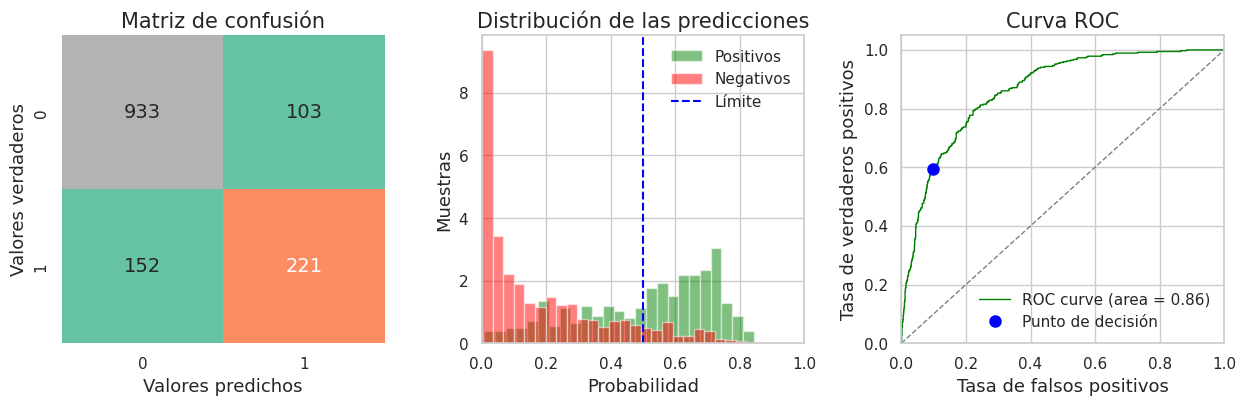

Precision: 0.68 | Recall: 0.59 | F1 Score: 0.63 | 


0.6341463414634146

In [ ]:
evalBinaryClassifier(model_list[1], X_test, y_test)

### ***LogisticRegressionCV***

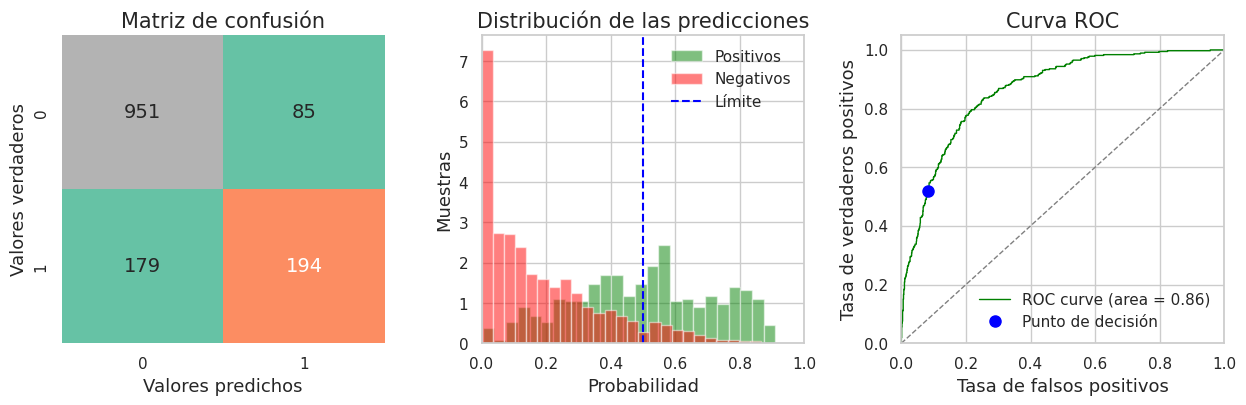

Precision: 0.7 | Recall: 0.52 | F1 Score: 0.6 | 


0.5950920245398773

In [ ]:
evalBinaryClassifier(model_list[2], X_test, y_test)

### ***MLPClassifier***

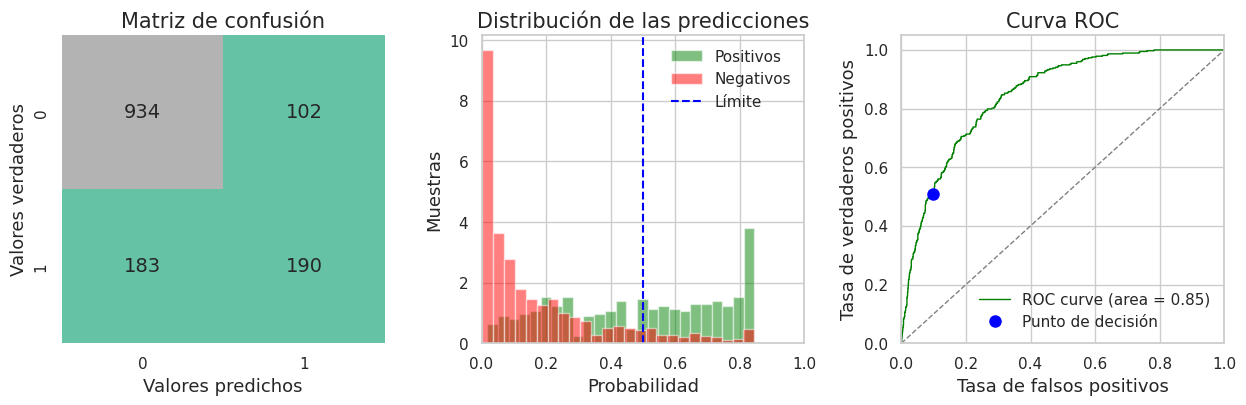

Precision: 0.65 | Recall: 0.51 | F1 Score: 0.57 | 


0.5714285714285715

In [ ]:
evalBinaryClassifier(model_list[3], X_test, y_test)

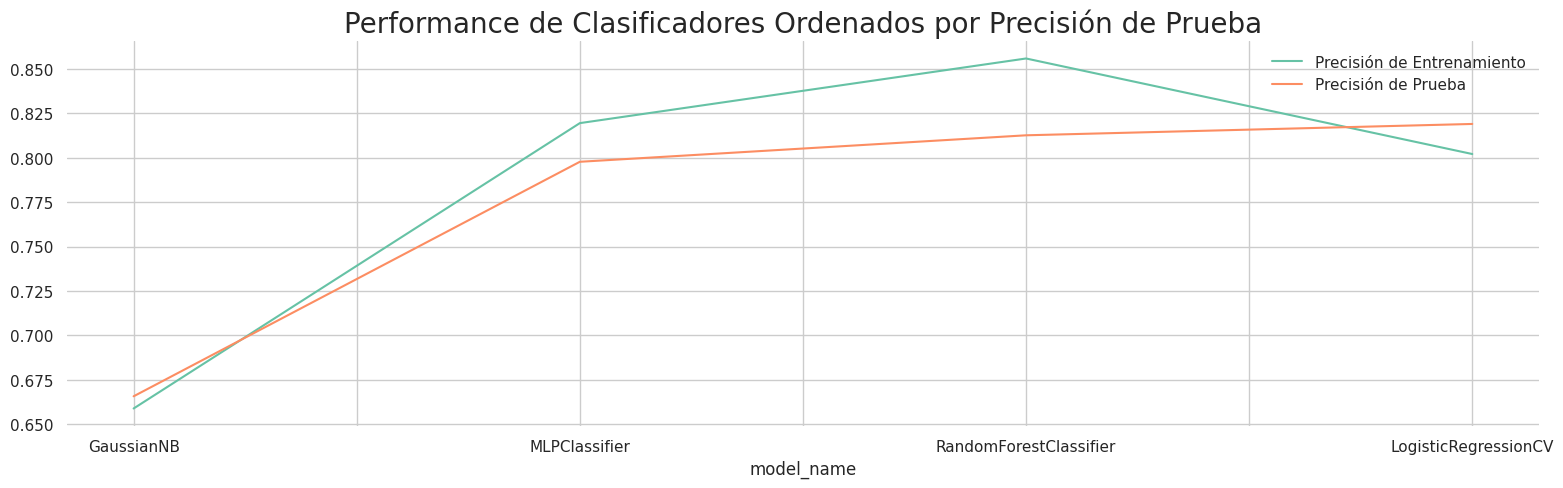

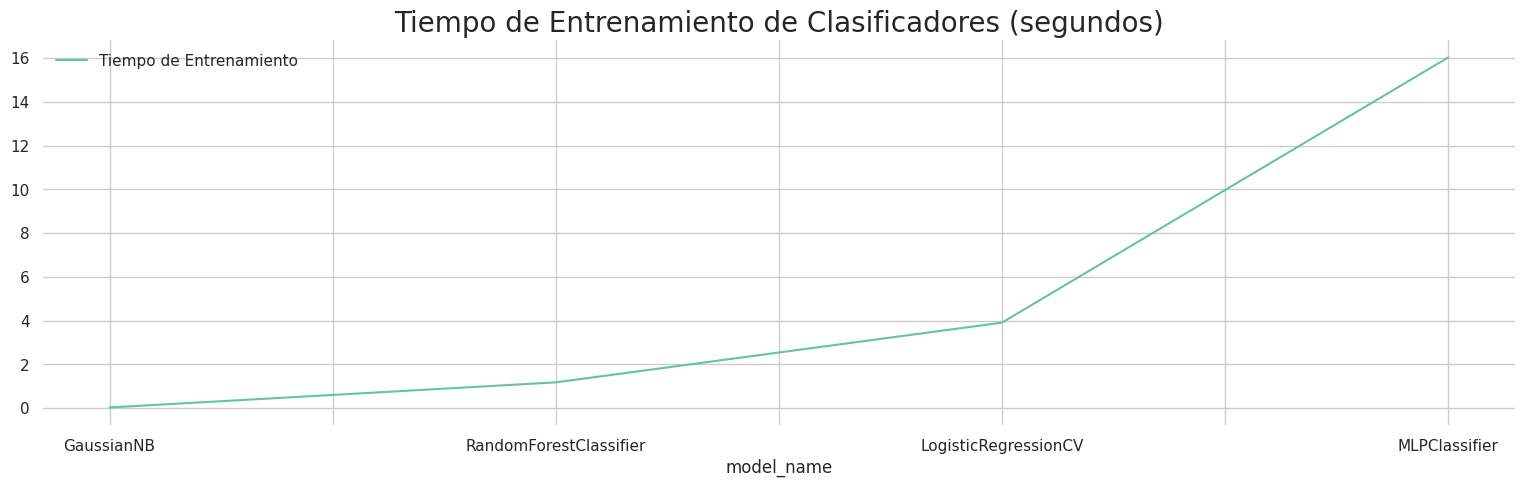

In [ ]:
# Visualización de precisión y tiempo de entrenamiento
def plot_results():
    df = pd.DataFrame(model_results)
    df.sort_values("test_score", inplace=True)

    ax = df[["train_score", "test_score", "model_name"]].plot(kind="line", x="model_name", figsize=(19, 5), title="Performance de Clasificadores Ordenados por Precisión de Prueba")
    ax.legend(["Precisión de Entrenamiento", "Precisión de Prueba"])

    ax.title.set_size(20)
    plt.box(False)

    df.sort_values("training_time", inplace=True)
    ax = df[["training_time", "model_name"]].plot(kind="line", x="model_name", figsize=(19, 5), grid=True, title="Tiempo de Entrenamiento de Clasificadores (segundos)")
    ax.title.set_size(20)
    ax.legend(["Tiempo de Entrenamiento"])
    plt.box(False)

plot_results()

# Explicabilidad Global:
- Regresión Logística
- Arbol de decisión

### Coeficientes de la Regresión Logística

En modelos como la regresión lineal y logística, podemos examinar los coeficientes del modelo para determinar la importancia de las variables, teniendo en cuenta que estos deben interpretarse con precaución según el tipo de modelo. Esto nos permite comprender cómo un incremento o cambio en cada variable puede influir en los logaritmos de las probabilidades de que un cliente abandone en nuestro caso de estudio (churn), además de ofrecer una visión general sobre la relevancia de cada variable para todo el conjunto de datos.

In [ ]:
data = df[categorical_features+numerical_features]

In [ ]:
data.head()

gender  seniorcitizen partner phoneservice     multiplelines  \
0  Female              0     Yes           No  No phone service   
1    Male              0      No          Yes                No   
2    Male              0      No          Yes                No   
3    Male              0      No           No  No phone service   
4  Female              0      No          Yes                No   

  internetservice onlinesecurity onlinebackup deviceprotection techsupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  streamingtv streamingmovies        contract paperlessbilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               paymentmethod dependents  tenure  monthlycharges totalcharges  
0           Electronic check         No       1           29.85        29.85  
1               Mailed check         No      34           56.95       1889.5  
2               Mailed check         No       2           53.85       108.15  
3  Bank transfer (automatic)         No      45           42.30      1840.75  
4           Electronic check         No       2           70.70       151.65

In [ ]:
data.shape

(7043, 19)

### Explicabilidad mediante Feature Importance Score Basado en Random Forest

Los modelos basados en árboles permiten determinar la relevancia de cada característica calculando la reducción promedio de impureza que aportan. Esto refleja cuánto contribuye una característica a disminuir la incertidumbre en clasificadores o la variabilidad en regresores, conocido como el puntaje de importancia de Gini. Usando la función feature_importance de sklearn, podemos visualizar el valor promedio de importancia de cada variable en nuestros modelos de árboles entrenados.

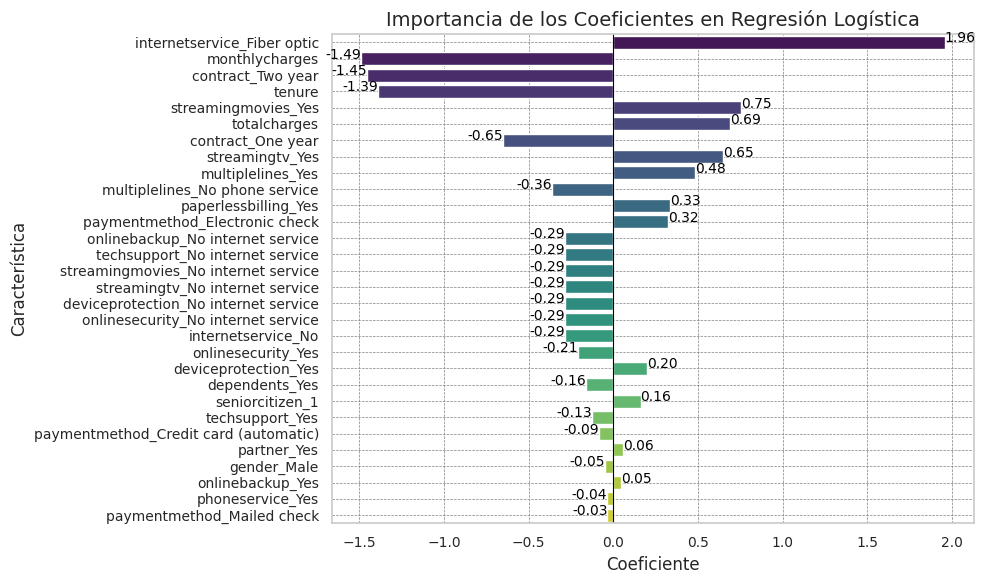

In [ ]:
coeficientes = model_list[1].coef_[0]
interseccion = model_list[1].intercept_[0]

coef_df = pd.DataFrame({

'Características' : X_train.columns,
'Coeficiente': coeficientes
})

coef_df['Importancia'] = coef_df['Coeficiente'].abs()
coef_df_sorted = coef_df.sort_values(by='Importancia', ascending=False)

#print(coef_df_sorted)
coef_df_sorted = coef_df_sorted.reset_index(drop = True)
#print(coef_df_sorted)


plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Características', data=coef_df_sorted, palette='viridis')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


# Añadir líneas verticales para separar positivos y negativos
plt.axvline(x=0, color='black', linewidth=0.8)


for index, row in coef_df_sorted.iterrows():
    plt.text(row['Coeficiente'], index, f"{row['Coeficiente']:.2f}", color='black', ha="left" if row['Coeficiente'] >=0 else "right", fontsize=10)

plt.title('Importancia de los Coeficientes en Regresión Logística', fontsize=14)
plt.xlabel('Coeficiente', fontsize=12)
plt.ylabel('Característica', fontsize=12)
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

plt.show()



# Random Forest

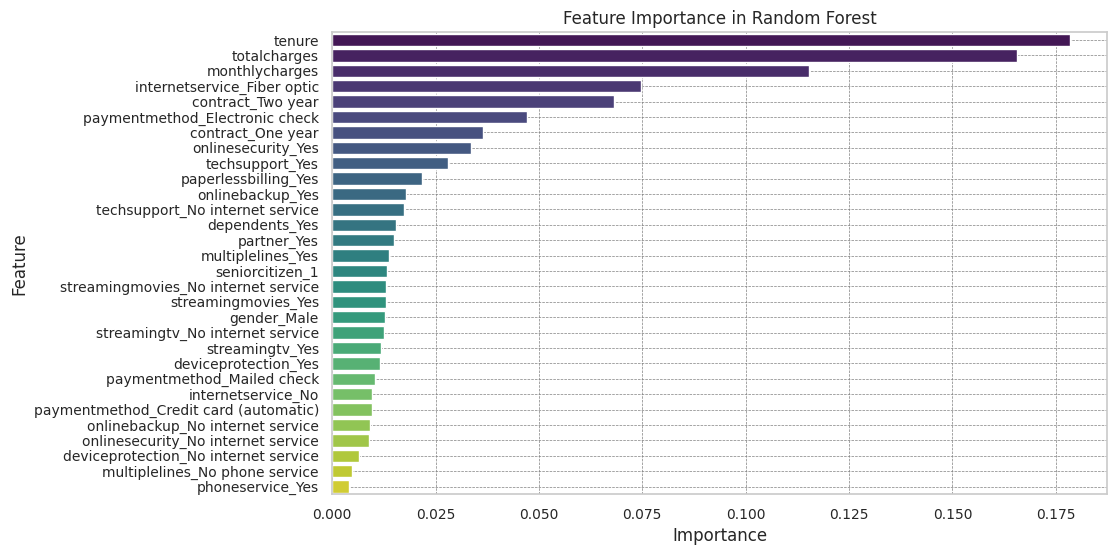

In [ ]:
coefficients = model_list[2].feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': coefficients
})

# Ordenar por importancia
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

plt.title('Feature Importance in Random Forest')
plt.show()

# LIME

$$
g^* = \underset{g \in G}{\text{argmin}} \; \mathcal{L}(f, g, \pi_{\mathbf{x}}) + \Omega(g)
$$


<div style="text-align: left;">
   <strong>La Explicación Localmente Interpretable Agnóstica al Modelo (LIME) ofrece un enfoque rápido y sencillo para generar explicaciones locales de modelos de caja negra. Este algoritmo puede desglosarse en unos pocos pasos básicos:

Primero, para un punto de datos específico, se modifican sus características de manera aleatoria varias veces. En el caso de datos tabulares, esto significa añadir una pequeña cantidad de ruido a cada característica. Luego, se obtienen predicciones para cada instancia de datos modificada, lo cual nos permite crear una visión local de cómo se comporta el modelo en ese punto. Finalmente, se usan estas predicciones para construir un "modelo de explicación" lineal aproximado, cuyos coeficientes actúan como explicaciones.</strong>

<div/>

In [ ]:
def definir_modelos(random_state=42):
    """
    Define una lista de modelos de machine learning para entrenar.

    Parameters:
    - random_state (int): Semilla para reproducibilidad.

    Returns:
    - modelos (list): Lista de tuplas con el nombre del modelo y su instancia.
    """
    modelos = [
        ('GaussianNB', GaussianNB()),
        ('Regresión Logística', LogisticRegressionCV()),
        ('Random Forest', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=random_state)),
        ('MLPClassifier', MLPClassifier(solver='adam', alpha=0.1, hidden_layer_sizes=(10, 10, 5, 2), max_iter=500, random_state=42))
    ]

    return modelos


def entrenar_modelos(modelos, X_train, y_train):
    """
    Entrena una lista de modelos de machine learning.

    Parameters:
    - modelos (list): Lista de tuplas con el nombre del modelo y su instancia.
    - X_train (pd.DataFrame): Datos de entrenamiento.
    - y_train (pd.Series): Objetivo de entrenamiento.

    Returns:
    - modelos_entrenados (list): Lista de tuplas con el nombre del modelo y el modelo entrenado.
    """
    modelos_entrenados = []
    for nombre, modelo in modelos:
        modelo.fit(X_train, y_train)
        modelos_entrenados.append((nombre, modelo))
        print(f"Modelo entrenado: {nombre}")
    return modelos_entrenados



def configurar_lime(X_train, feature_names, class_names=['Clase 0', 'Clase 1']):
    """
    Configura el objeto explicador de LIME.

    Parameters:
    - X_train (pd.DataFrame): Datos de entrenamiento.
    - feature_names (list): Lista de nombres de las características.
    - class_names (list): Nombres de las clases.

    Returns:
    - explainer (LimeTabularExplainer): Objeto explicador de LIME.
    """
    explainer = LimeTabularExplainer(
        training_data=X_train.values,
        feature_names=feature_names,
        class_names=class_names,
        mode='classification'
    )
    return explainer

def generar_explicacion_lime(explainer, modelo, instancia, num_features=10):# *****
    """
    Genera una explicación LIME para una instancia específica y un modelo dado.

    Parameters:
    - explainer (LimeTabularExplainer): Objeto explicador de LIME.
    - modelo: Modelo entrenado.
    - instancia (pd.Series o np.array): Instancia a explicar.
    - num_features (int): Número de características a mostrar en la explicación.

    Returns:
    - exp (Explanation): Objeto de explicación de LIME.
    """

    predict_proba = modelo.predict_proba
    exp = explainer.explain_instance(instancia, predict_proba, num_features=num_features, top_labels=5)

    return exp, predict_proba


def predecir_con_lime(modelo, explainer, instancia, num_features=5):
    """
    Realiza una predicción y genera una explicación LIME para una instancia específica.

    Parameters:
    - modelo: Modelo entrenado.
    - explainer (LimeTabularExplainer): Objeto explicador de LIME.
    - instancia (pd.Series o np.array): Instancia a predecir y explicar.
    - num_features (int): Número de características a mostrar en la explicación.

    Returns:
    - prediccion (int): Predicción del modelo.
    - prediccion_proba (np.array): Probabilidades de cada clase.
    - exp (Explanation): Objeto de explicación de LIME.
    """
    prediccion = modelo.predict(instancia.values.reshape(1, -1))[0]
    prediccion_proba = modelo.predict_proba(instancia.values.reshape(1, -1))[0]

    start_time = time.time()

    exp, predict_proba = generar_explicacion_lime(explainer, modelo, instancia, num_features)

    tiempo = time.time() - start_time

    lime_class = exp.local_pred[0]


    return prediccion, prediccion_proba, predict_proba, exp, tiempo, lime_class


def visualizar_lime_subplots(explicaciones, modelos, figsize=(20, 5)):
    """
    Visualiza múltiples explicaciones LIME en subplots lado a lado.

    Parameters:
    - explicaciones (list): Lista de objetos de explicación LIME.
    - modelos (list): Lista de nombres de los modelos correspondientes.
    - figsize (tuple): Tamaño de la figura.

    Returns:
    - None
    """
    num_modelos = len(modelos)
    fig, axes = plt.subplots(1, num_modelos, figsize=figsize)

    if num_modelos == 1:
        axes = [axes]

    for ax, exp, nombre in zip(axes, explicaciones, modelos):
        # Obtener las contribuciones de las características
        contribuciones = exp.as_list()
        features = [item[0] for item in contribuciones]
        valores = [item[1] for item in contribuciones]


        df_exp = pd.DataFrame({
            'Feature': features,
            'Contribution': valores
        })

        # Ordenar por la contribución
        df_exp = df_exp.sort_values(by='Contribution', ascending=True)


        color_list =  sns.color_palette("dark", len(df_exp.columns))



        ax.barh(df_exp['Feature'], df_exp['Contribution'], color=['#66C2A5' if val > 0 else '#FC8D62' for val in df_exp['Contribution']])

        ax.set_title(f'Explicación LIME para {nombre}')
        ax.set_xlabel('Contribución')
        ax.set_ylabel('Características')

    plt.tight_layout()
    plt.show()

def visualizar_tiempo(tiempo_l, modelos, figsize=(20, 5)):

        df_t = pd.DataFrame({
            'modelo': [m[0] for m in modelos],
            'tiempo': tiempo_l
        })

        # Ordenar por la contribución
        df_t = df_t.sort_values(by='tiempo', ascending=True)
        print(df_t)
        lt = df_t.plot(kind="line",
                       x='modelo',
                      title='Tiempo de ejecución(s) para la explicación de LIME',
                      figsize=(25,8))
        lt.title.set_size(20)
        lt.legend(["Tiempo de ejecución"])
        plt.box(False)


def v2(exp, predict_proba):

    df_class = pd.DataFrame({
            'clase1_lime': lime_class_l,
            'clase_actual': [p[0] for p in predict_proba],
            'modelo': [m[0] for m in modelos]
        })
    df_class = df_class.sort_values(by='clase_actual', ascending=True)
    lt = df_class.plot(kind="line",
                      x='modelo',
                      title='Predicciones',
                      figsize=(25,8))
    lt.title.set_size(20)
    lt.legend(["Predicción Local", "Predicción actual"])
    plt.box(False)

In [ ]:
modelos = definir_modelos()
modelos_entrenados = entrenar_modelos(modelos, X_train, y_train)


feature_columns = X_train.columns.tolist()  # Obtener los nombres de las características
explainer = configurar_lime(X_train, feature_columns)


instancia = X_test.iloc[0]


#Generar las explicaciones LIME para cada modelo
explicaciones = []
nombres_modelos = []
predicciones = []
probabilidades = []
predict_proba = []
tiempo_l = []
lime_class_l = []

for nombre, modelo in modelos_entrenados:
    print(f"\nGenerando explicación LIME para el modelo: {nombre}")
    pred, pred_proba, predict_prob, exp, tiempo, lime_class = predecir_con_lime(modelo, explainer, instancia)
    predicciones.append(pred)
    probabilidades.append(pred_proba)
    explicaciones.append(exp)
    tiempo_l.append(tiempo)
    nombres_modelos.append(nombre)
    predict_proba.append(pred_proba)
    lime_class_l.append(lime_class)

    print(f"Probabilidades: Clase 0: {pred_proba[0]:.4f}, Clase 1: {pred_proba[1]:.4f}")


Modelo entrenado: GaussianNB
Modelo entrenado: Regresión Logística
Modelo entrenado: Random Forest
Modelo entrenado: MLPClassifier

Generando explicación LIME para el modelo: GaussianNB
Probabilidades: Clase 0: 0.0005, Clase 1: 0.9995

Generando explicación LIME para el modelo: Regresión Logística
Probabilidades: Clase 0: 0.3012, Clase 1: 0.6988

Generando explicación LIME para el modelo: Random Forest
Probabilidades: Clase 0: 0.2792, Clase 1: 0.7208

Generando explicación LIME para el modelo: MLPClassifier
Probabilidades: Clase 0: 0.1706, Clase 1: 0.8294



Visualizando todas las explicaciones LIME en subplots:


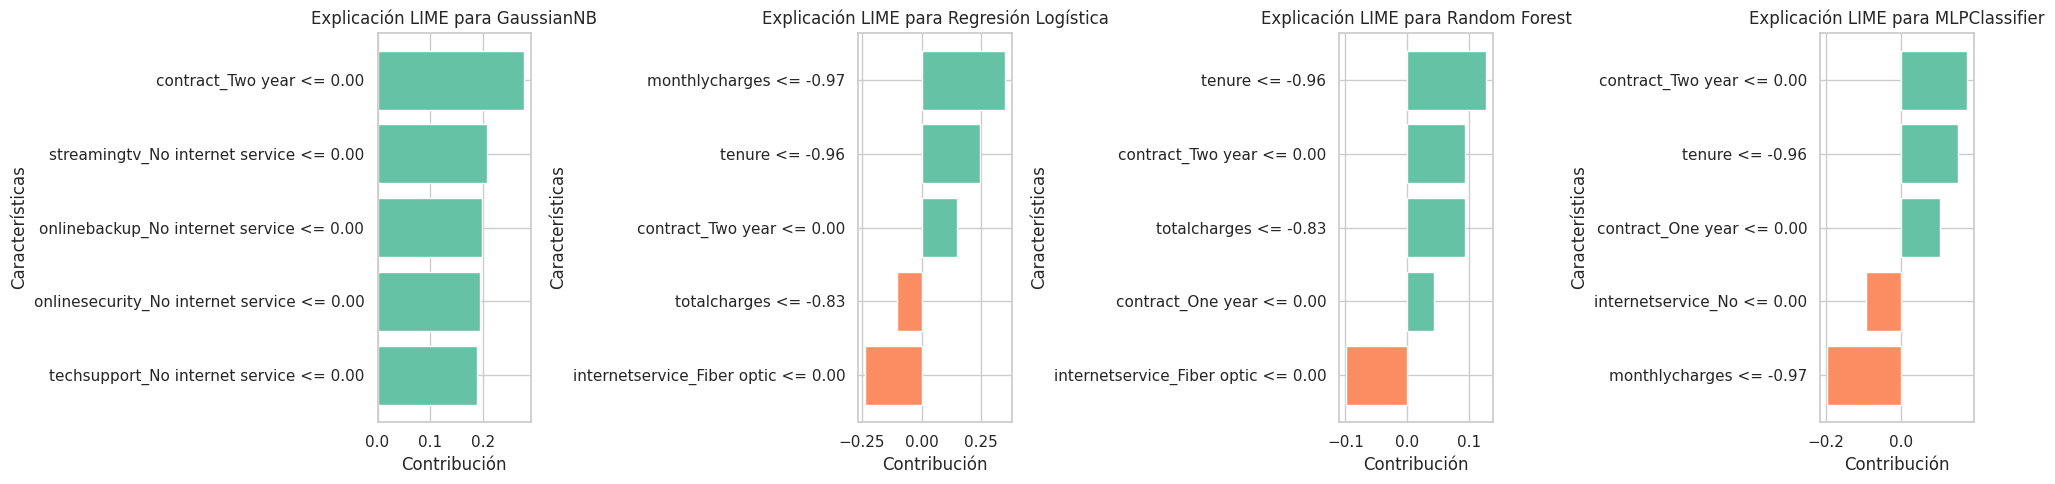

In [ ]:
print("\nVisualizando todas las explicaciones LIME en subplots:")
visualizar_lime_subplots(explicaciones, nombres_modelos, figsize=(20, 5));


                modelo    tiempo
1  Regresión Logística  0.905083
3        MLPClassifier  0.914666
0           GaussianNB  0.956092
2        Random Forest  0.979956


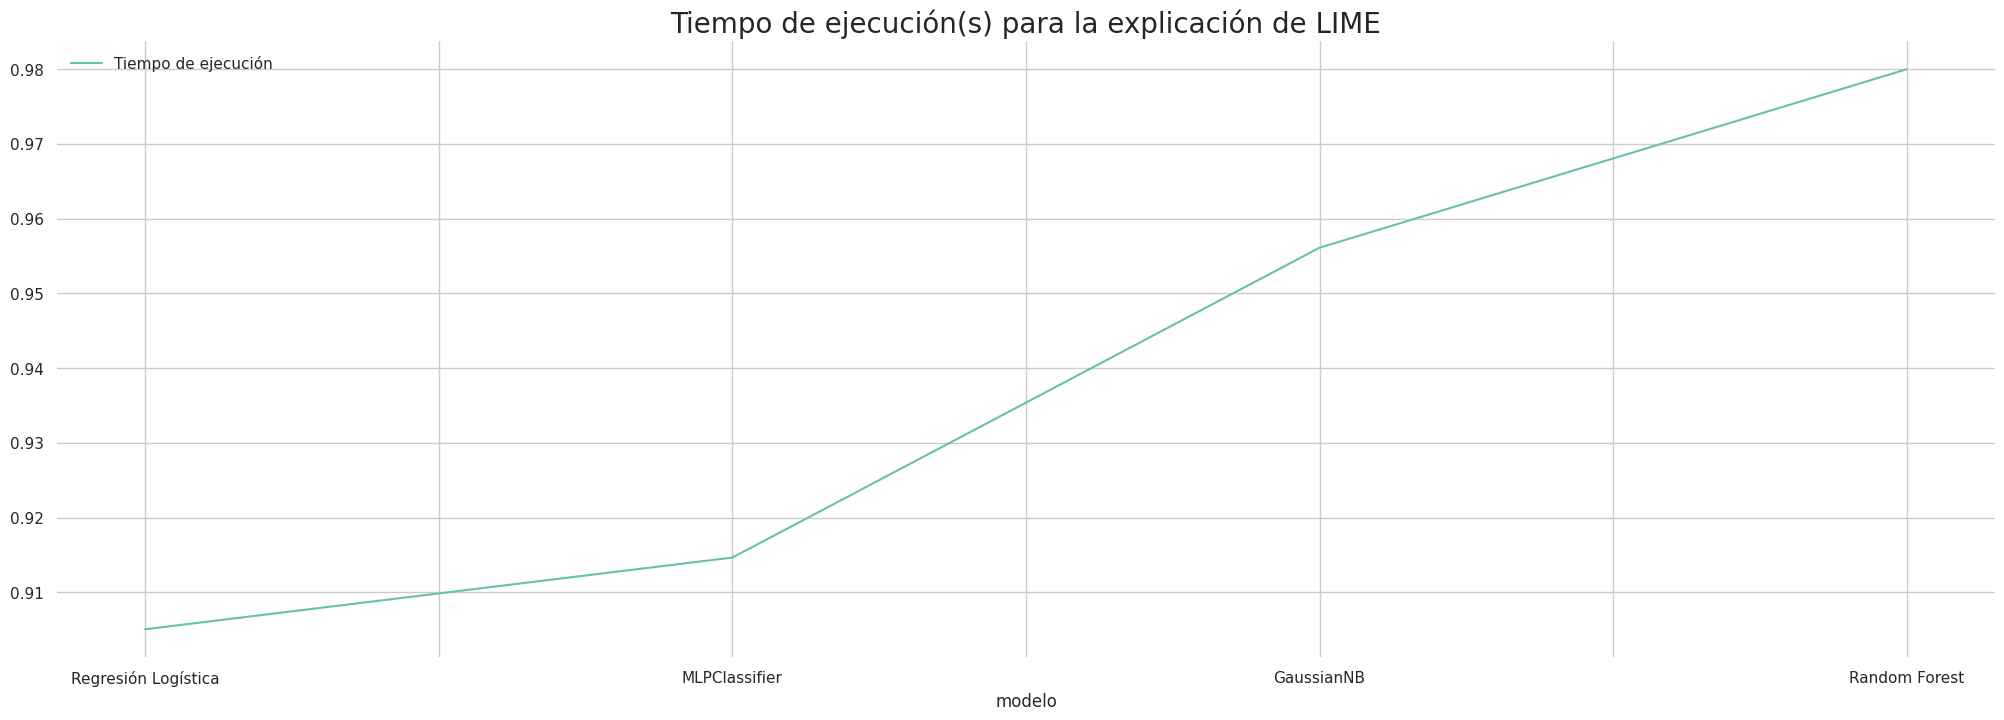

In [ ]:
visualizar_tiempo(tiempo_l, modelos, figsize=(20, 5));

## Evaluación de Lime ¿ Es confiable la explicación?

LIME (Explicaciones de Modelos Agnósticos Localmente Interpretables) emplea un modelo lineal aproximado para generar interpretaciones locales de los resultados de un modelo de machine learning. No obstante, <u>como cualquier modelo de machine learning,
el modelo de explicación de LIME también puede presentar limitaciones y no ser siempre preciso.</u>

Para fortalecer nuestra confianza en la calidad de una explicación, un primer paso consiste en revisar si el modelo local creado por LIME logra aproximarse adecuadamente al modelo original. Esto implica verificar si la representación simplificada que LIME genera es suficientemente fiel para capturar el comportamiento del modelo en ese punto específico.

Este análisis nos ayuda a determinar si la explicación proporcionada por LIME es confiable o si podría estar interpretando de forma incorrecta el comportamiento del modelo.

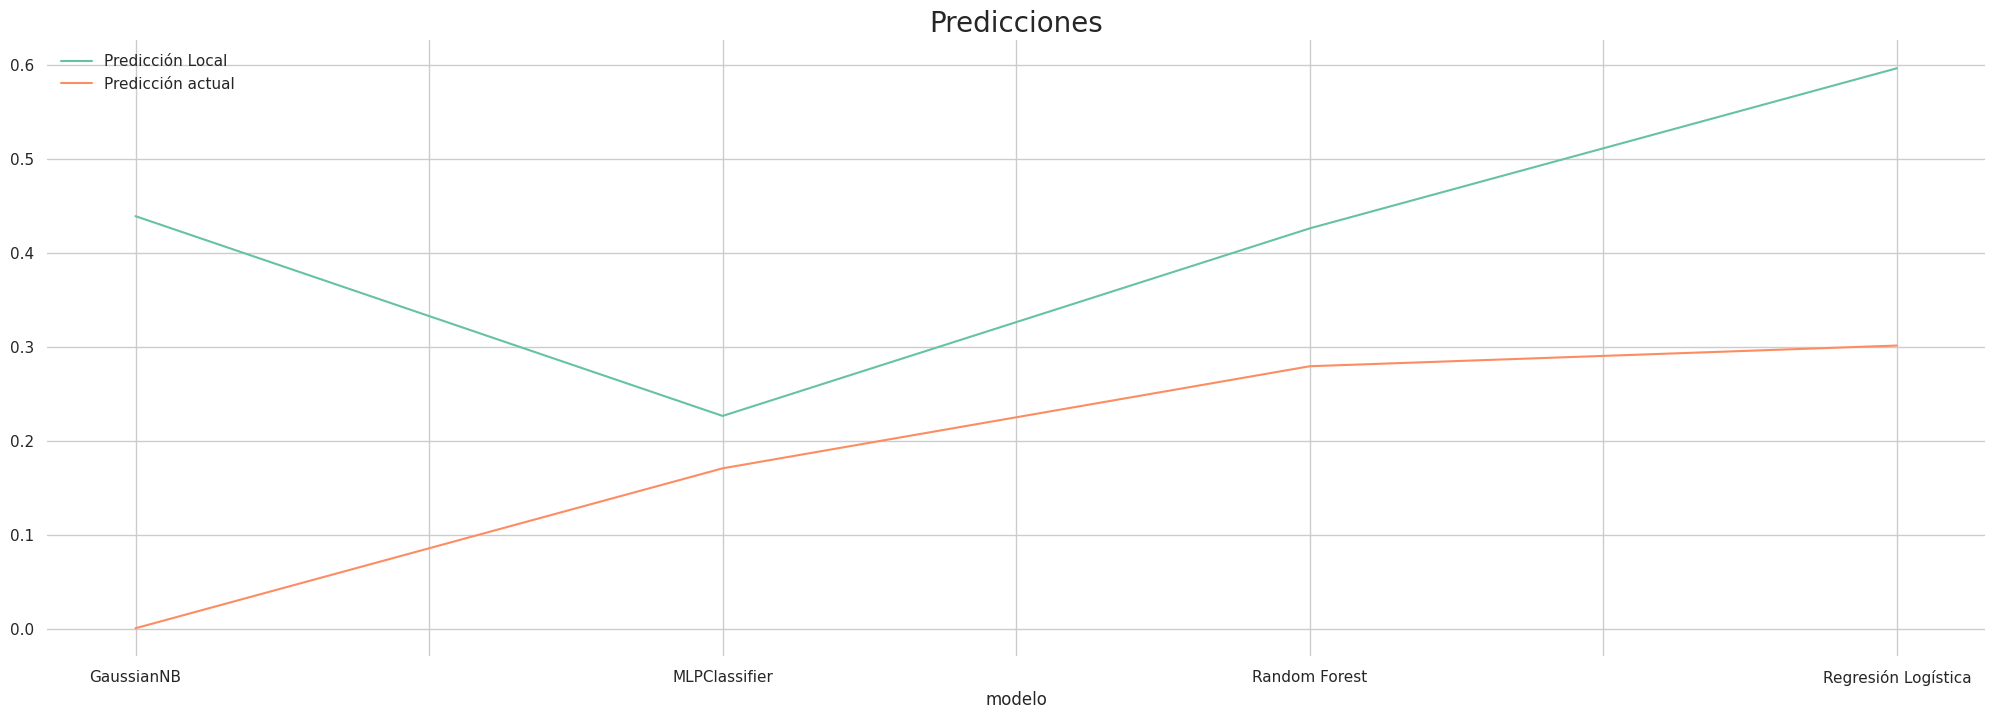

In [ ]:
v2(exp, predict_proba);

# SHAP

$$\
\phi_i(v) =\sum_{S \subseteq n \setminus \{i\}} \frac{|S|! \cdot (|n| - |S| - 1)!}{|n|!}\left[ v(S \cup \{i\}) - v(S) \right]
$$

# SHAP: Shapley Additive Explanations

Los Shapley values son un método para asignaciones en un entorno de juego multijugador colaborativo, con un conjunto de propiedades axiomáticas deseables que garantizan la equidad: Eficiencia, Simetría, Linealidad, Anonimato y Marginalismo. Estos valores se calculan promediando la contribución marginal de cada persona en todos los posibles órdenes.

En el contexto del aprendizaje automático, cada característica se puede comparar con nuestros científicos de datos y la predicción del modelo con las ganancias. Para explicar nuestro modelo, añadimos repetidamente cada característica y anotamos su contribución marginal a la predicción del modelo. Es importante usar los Shapley values para asignar crédito a cada característica porque proporcionan dos garantías importantes que otros métodos no ofrecen:

- Precisión local: Un modelo aproximado utilizado para explicar el modelo original debe coincidir con la salida del modelo original para una entrada dada.
- Consistencia: Si el modelo original cambia de manera que una característica tiene un mayor impacto en todos los órdenes posibles, entonces su atribución no debe disminuir.

En la práctica, se requieren algunas simplificaciones para calcular estos valores. La más importante está relacionada con cómo simulamos la adición o eliminación de características al calcular la predicción del modelo. Esto es desafiante porque no hay una forma sencilla de “eliminar” una característica en la mayoría de los modelos predictivos en tiempo de prueba. Podemos reemplazar la característica con su valor medio o mediano. En la implementación de la biblioteca SHAP, una característica “faltante” se simula reemplazándola con los valores que toma en el conjunto de datos de fondo.

3 tipos de explainers en SHAP (nos ayudan a explicar el modelo y a partir de ellos obtenemos los shapley values):
- tree explainer: optimizado para estructuras de arboles de decision
- gradien explainer y deep explainer: optimizado para redes neuronales
- kernel explainer: No asume estructura concreta (Model Agnostic)

In [ ]:
X_train_sub = shap.sample(X_train, 20, random_state=42)
X_test_sub = shap.sample(X_test, 1, random_state=42)

## Kernal Explainer: Explainer agnostico al modelo. Sirve para cualquiera

Aqui vamos a explicar una predicción para un instancia de datos concreta usando Kernel Explainer y shap values

In [ ]:
def explain_with_shap_kernel(model, X_train, X_test, num_samples_train=300, num_samples_test=1):
    """
    Explica la predicción de un modelo usando SHAP values.

    Parametros:
    - model: Modelo entrenado a explicar.
    - X_train: Training data.
    - X_test: Test data.
    - num_samples_train: Número de muestras a utilizar para los datos de entrenamiento.
    - num_samples_test: Número de muestras a utilizar para los datos de testeo.

    Devuelve:
    - Explainer: Instancia que genera explicaciones de modelos.
    - Shap values: Shapley values extraidos del Explainer.
    """
    sub_sampled_train_data = shap.sample(X_train, num_samples_train, random_state=42)
    subsampled_test_data = shap.sample(X_train, num_samples_test, random_state=42)

    start_time = time.time()
    explainer = shap.KernelExplainer(model.predict_proba, sub_sampled_train_data)
    shap_values = explainer.shap_values(subsampled_test_data, l1_reg="aic")
    elapsed_time = time.time() - start_time

    print("Kernel Explainer SHAP run time", round(elapsed_time, 3), " seconds.")
    print("SHAP expected value", explainer.expected_value)
    print("Model mean value", model.predict_proba(X_train).mean(axis=0))
    print("Model prediction for test data", model.predict_proba(subsampled_test_data))

    return explainer, shap_values

In [ ]:
shap.initjs()

In [ ]:
mlp_fitted = model_list[3]

explainer, shap_values_mlp = explain_with_shap_kernel(mlp_fitted, X_train, X_test, num_samples_train=50)

  0%|          | 0/1 [00:00<?, ?it/s]

Kernel Explainer SHAP run time 0.875  seconds.
SHAP expected value [0.71209337 0.28790663]
Model mean value [0.74720079 0.25279921]
Model prediction for test data [[0.79983891 0.20016109]]


El force plot muestra como mueven la prediccion los diferentes vcalores de los shap values de una forma intuitiva, aclarando cuales son las caracteristicas que bajal el valor de la predicción y cuales son los que la suben

IMP: Funciona solo para una instancia de datos. El subsample de test debe ser = 1

In [ ]:
shap.initjs()
shap.force_plot(
    explainer.expected_value[1],
    shap_values_mlp[1][0],
    X_test_sub,
    feature_names=X_train.columns,
)

El summary plot muestra las caracteristicas mas importantes para una predicción o varias.

IMP: El subsample de test puede ser de cualquier tamaño.

Si pasamos como argumento solo los shap_values, se tendran en cuenta las predicciones para la clase positiva y la negativa. Pero esto podemos modificarlo si queremos para ver mas claramente la explicacion de una sola clase:

- shap_values[0]: trae solo los shapley values de la clase negativa.
- shap_values[1]: trae solo los shapley values de la clase positiva

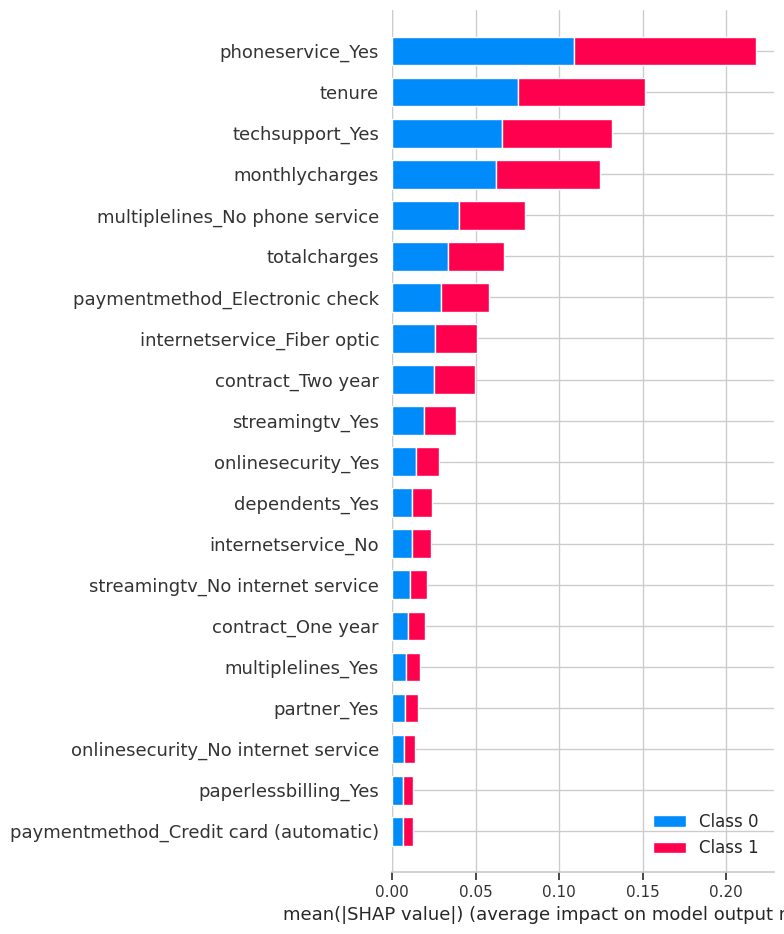

In [ ]:
shap.summary_plot(shap_values_mlp, X_train, plot_type="bar")

## Explicación de varios modelos (Usando Model Agnostic Method)

Como el Kernel Explainer es independiente del tipo de modelo que le demos de input, podemos utilizarlo para graficar las feature importance de todos los modelos y podes compararlos más facilmente.

Podemos apreciar en el grafico de esta seccion como para cada modelo es diferente el orden de los valores que mas influencia para arriba o abajo la predicción.

In [ ]:
shap_data_explainations = []
shap_explanation_time = []
shap_values_models = []
feat_names = list(X_train.columns)
data_subsample_train = 500
data_subsample_test = 1


for current_model in model_list:

    start_time = time.time()

    current_model_name = type(current_model).__name__

    explainer, shap_values = explain_with_shap_kernel(current_model, X_train, X_test, num_samples_train=50)

    elapsed_time = time.time() - start_time

    shap_data_explainations.append(explainer)

    shap_explanation_time.append(
        {"time": elapsed_time, "model": current_model_name})

    shap_values.append(shap_values_models)

  0%|          | 0/1 [00:00<?, ?it/s]

Kernel Explainer SHAP run time 1.033  seconds.
SHAP expected value [0.46065203 0.53934797]
Model mean value [0.46296235 0.53703765]
Model prediction for test data [[0.00659528 0.99340472]]


  0%|          | 0/1 [00:00<?, ?it/s]

Kernel Explainer SHAP run time 1.013  seconds.
SHAP expected value [0.71413584 0.28586416]
Model mean value [0.73447176 0.26552824]
Model prediction for test data [[0.84643519 0.15356481]]


  0%|          | 0/1 [00:00<?, ?it/s]

Kernel Explainer SHAP run time 2.327  seconds.
SHAP expected value [0.6943149 0.3056851]
Model mean value [0.73361077 0.26638923]
Model prediction for test data [[0.824185 0.175815]]


  0%|          | 0/1 [00:00<?, ?it/s]

Kernel Explainer SHAP run time 0.624  seconds.
SHAP expected value [0.71209337 0.28790663]
Model mean value [0.74720079 0.25279921]
Model prediction for test data [[0.79983891 0.20016109]]


In [ ]:
def plot_shap_exp(fig, fig_index, exp_data, title):
    features = list(exp_data.keys())[::-1]
    explanations = list(exp_data.values())[::-1]
    ax = fig.add_subplot(fig_index)
    lime_bar = ax.barh(features, explanations)
    ax.set_title(title, fontsize=20)
    for i, bar in enumerate(lime_bar):
        bar.set_color(color_list[list(current_data.columns).index(features[i])])
        plt.box(False)

In [ ]:
color_list = sns.color_palette("dark", len(X_train.columns))

  0%|          | 0/1 [00:00<?, ?it/s]

Kernel Explainer SHAP run time 0.729  seconds.
SHAP expected value [0.46065203 0.53934797]
Model mean value [0.46296235 0.53703765]
Model prediction for test data [[0.00659528 0.99340472]]


  0%|          | 0/1 [00:00<?, ?it/s]

Kernel Explainer SHAP run time 0.702  seconds.
SHAP expected value [0.71413584 0.28586416]
Model mean value [0.73447176 0.26552824]
Model prediction for test data [[0.84643519 0.15356481]]


  0%|          | 0/1 [00:00<?, ?it/s]

Kernel Explainer SHAP run time 1.603  seconds.
SHAP expected value [0.6943149 0.3056851]
Model mean value [0.73361077 0.26638923]
Model prediction for test data [[0.824185 0.175815]]


  0%|          | 0/1 [00:00<?, ?it/s]

Kernel Explainer SHAP run time 0.62  seconds.
SHAP expected value [0.71209337 0.28790663]
Model mean value [0.74720079 0.25279921]
Model prediction for test data [[0.79983891 0.20016109]]


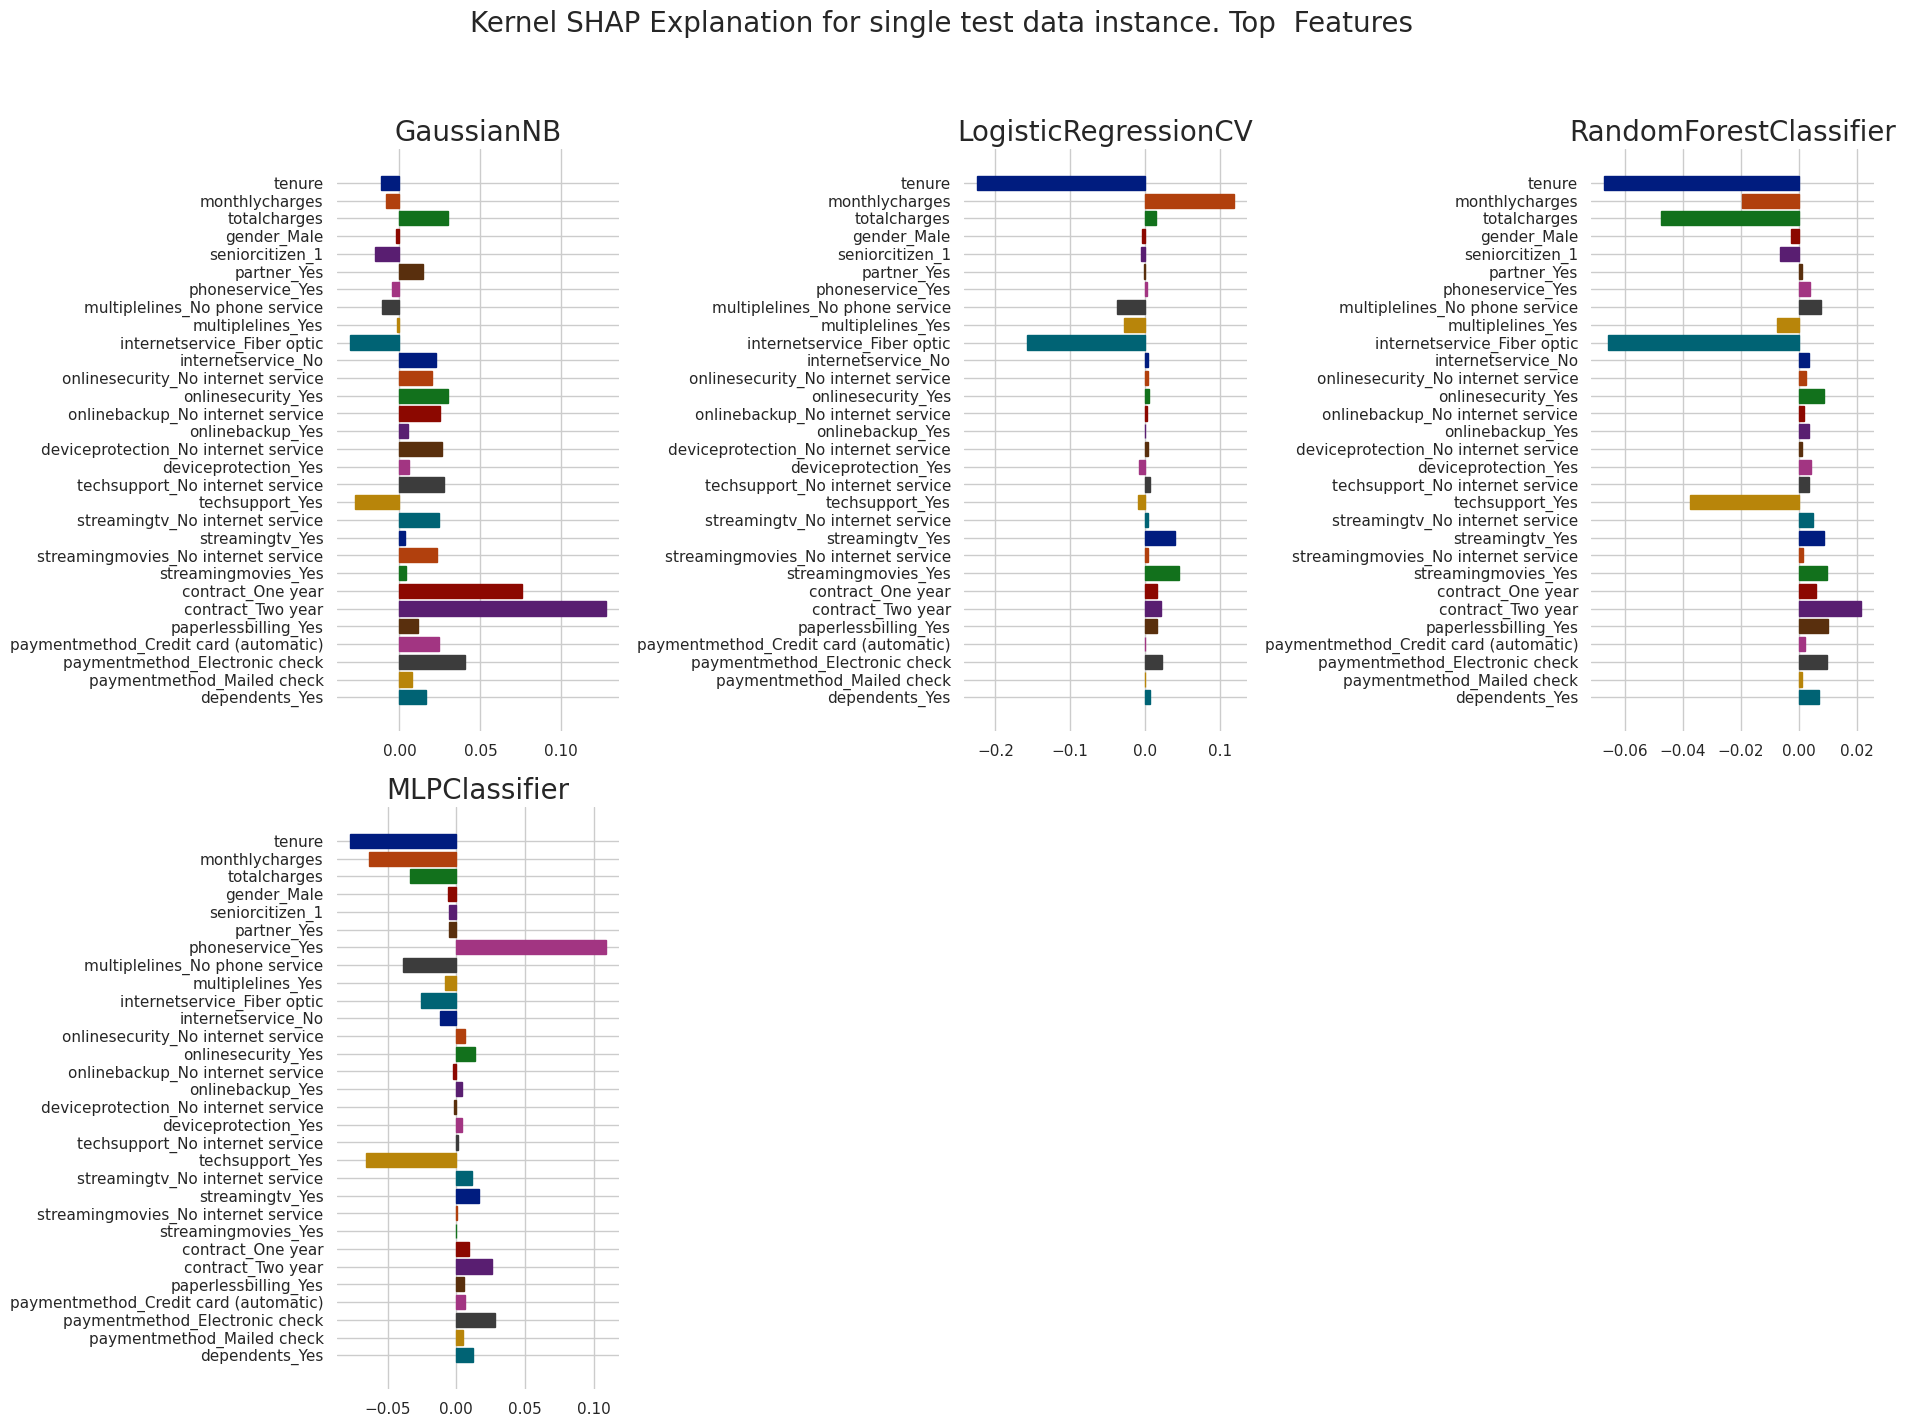

In [ ]:
# Asegúrate de que shap_values_models contiene las explicaciones SHAP correctas
shap_values_models = []
for current_model in model_list:
    explainer, shap_values = explain_with_shap_kernel(current_model, X_train, X_test, num_samples_train=50)
    shap_values_dict = dict(zip(X_train.columns, shap_values[1][0]))  # Convert SHAP values to dictionary
    shap_values_models.append(shap_values_dict)  # Almacena las explicaciones SHAP para la clase positiva

# Función para graficar las explicaciones SHAP
def plot_shap_exp(fig, fig_index, exp_data, title):
    features = list(exp_data.keys())[::-1]
    explanations = list(exp_data.values())[::-1]
    ax = fig.add_subplot(fig_index)
    lime_bar = ax.barh(features, explanations)
    ax.set_title(title, fontsize=20)
    for i, bar in enumerate(lime_bar):
        bar.set_color(color_list[list(X_train.columns).index(features[i])])
        plt.box(False)

# Graficar las explicaciones SHAP
fig = plt.figure(figsize=(19, 15))
for i, dex in enumerate(shap_values_models):
    fig_index = 230 + (i + 1)
    plot_shap_exp(fig, fig_index, dex, type(model_list[i]).__name__)

plt.suptitle(
    "Kernel SHAP Explanation for single test data instance. Top "
    + " Features",
    fontsize=20,
    fontweight="normal",
)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Tree explainer: Explainer optimizado para modelos basados en arboles

Pasarle los datos de entrenamiento o un subset de ellos es opcional para modelos basados en arboles de decisión.

## ¿Cómo se obtienen las importancias de las caracteristicas en sklearn sin necesidad de usar metodos extra?
Los modelos basados en árboles tienen propiedades que nos permiten inferir la importancia de una característica. Para cada árbol de decisión, podemos calcular la disminución media de la impureza para cada característica, es decir, cuán impactante es la característica en la reducción de la incertidumbre (clasificadores) o la varianza (regresores) de la predicción del árbol de decisión. Este valor también se conoce como gini importance score. Para cada modelo basado en árboles en nuestra lista de modelos entrenados, podemos aprovechar la implementación de feature_importance de sklearn y visualizar la importancia promedio de cada variable.

In [ ]:
def explain_with_shap_tree(model, X_train, X_test, num_samples_train=300, num_samples_test=1):
    """
    Explain a model's prediction using SHAP values. Optimized for Tree based models

    Parameters:
    - model: Trained model to explain.
    - X_train: Training data.
    - X_test: Test data.
    - sample_index: Index of the sample in the test data to explain.
    - num_samples: Number of samples to use for the background data.

    Returns:
    - None
    """
    sub_sampled_train_data = shap.sample(X_train, num_samples_train, random_state=42)
    subsampled_test_data = shap.sample(X_train, num_samples_test, random_state=42)

    start_time = time.time()
    explainer = shap.KernelExplainer(model.predict_proba, sub_sampled_train_data)
    shap_values = explainer.shap_values(subsampled_test_data, l1_reg="aic")
    elapsed_time = time.time() - start_time

    print("Kernel Explainer SHAP run time", round(elapsed_time, 3), " seconds.")
    print("SHAP expected value", explainer.expected_value)
    print("Model mean value", model.predict_proba(X_train).mean(axis=0))
    print("Model prediction for test data", model.predict_proba(subsampled_test_data))

    return explainer, shap_values

In [ ]:
explainer, shap_values_tree = explain_with_shap_tree(model_list[2], X_train, X_test, num_samples_train=50)

  0%|          | 0/1 [00:00<?, ?it/s]

Kernel Explainer SHAP run time 1.568  seconds.
SHAP expected value [0.6943149 0.3056851]
Model mean value [0.73361077 0.26638923]
Model prediction for test data [[0.824185 0.175815]]


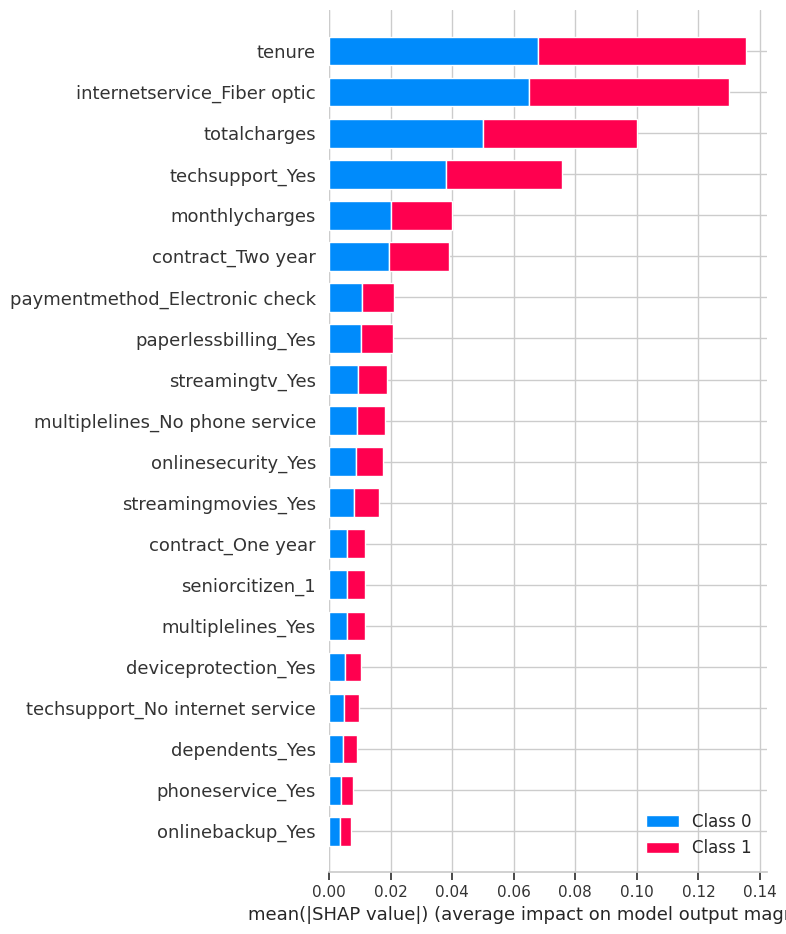

In [ ]:
shap.summary_plot(shap_values_tree, X_train, plot_type="bar")

In [ ]:
shap.initjs()

shap.force_plot(
    explainer.expected_value[1],
    shap_values_tree[1][0],
    X_test_sub,
    feature_names=X_train.columns,
)

In [ ]:
rf_fitted = model_list[2]

In [ ]:
X_train_sub = shap.sample(X_train, 50, random_state=42)
X_test_sub = shap.sample(X_test, 50, random_state=42)

In [ ]:
explainer = shap.TreeExplainer(rf_fitted)
shap_values = explainer.shap_values(X_test_sub)

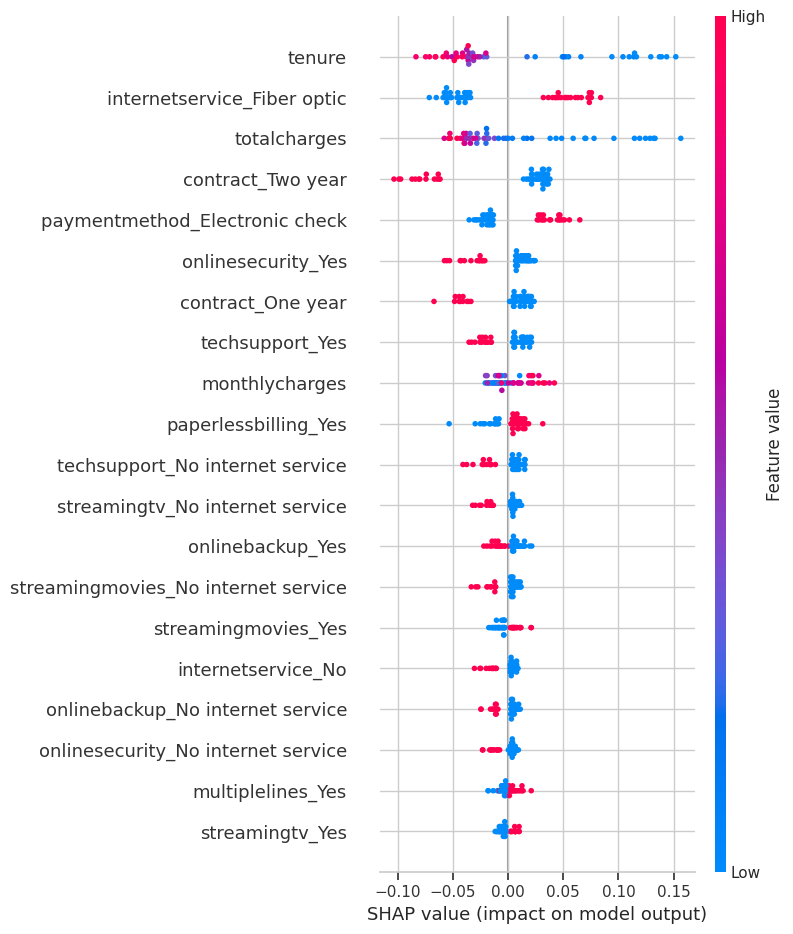

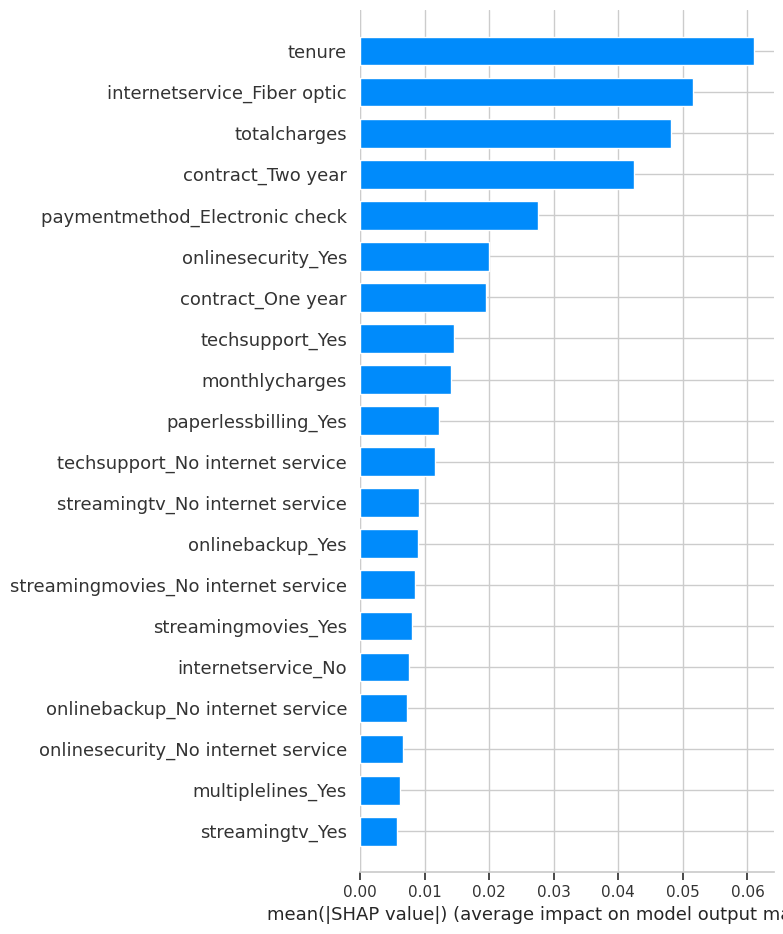

In [ ]:
shap.summary_plot(shap_values[1], X_test_sub)
shap.summary_plot(shap_values[1], X_test_sub, plot_type="bar")

El gráfico de decisión visualizará la decisión de un modelo observando los valores “SHAP” para una fila en particular. Si trazas demasiadas muestras a la vez, puede hacer que tu gráfico sea ilegible.

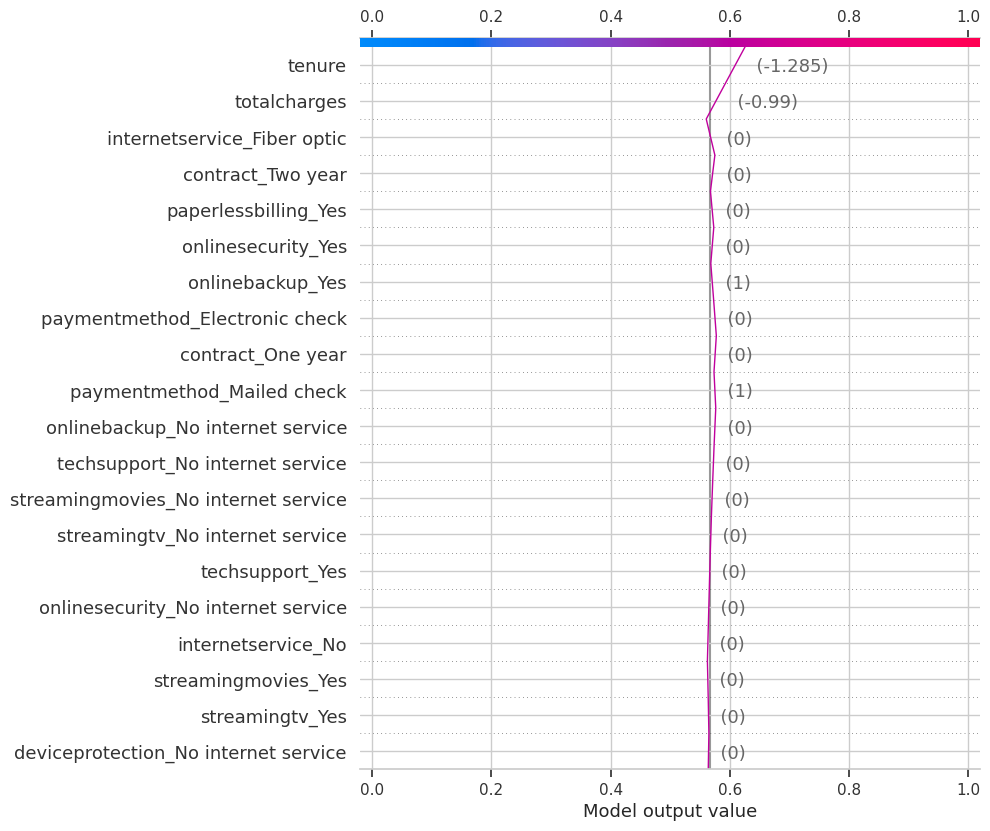

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_values[1][0], X_test_sub, link='logit')

Podemos ver un decision plot de varias instancias de datos de predicción, en este caso agarramos 3

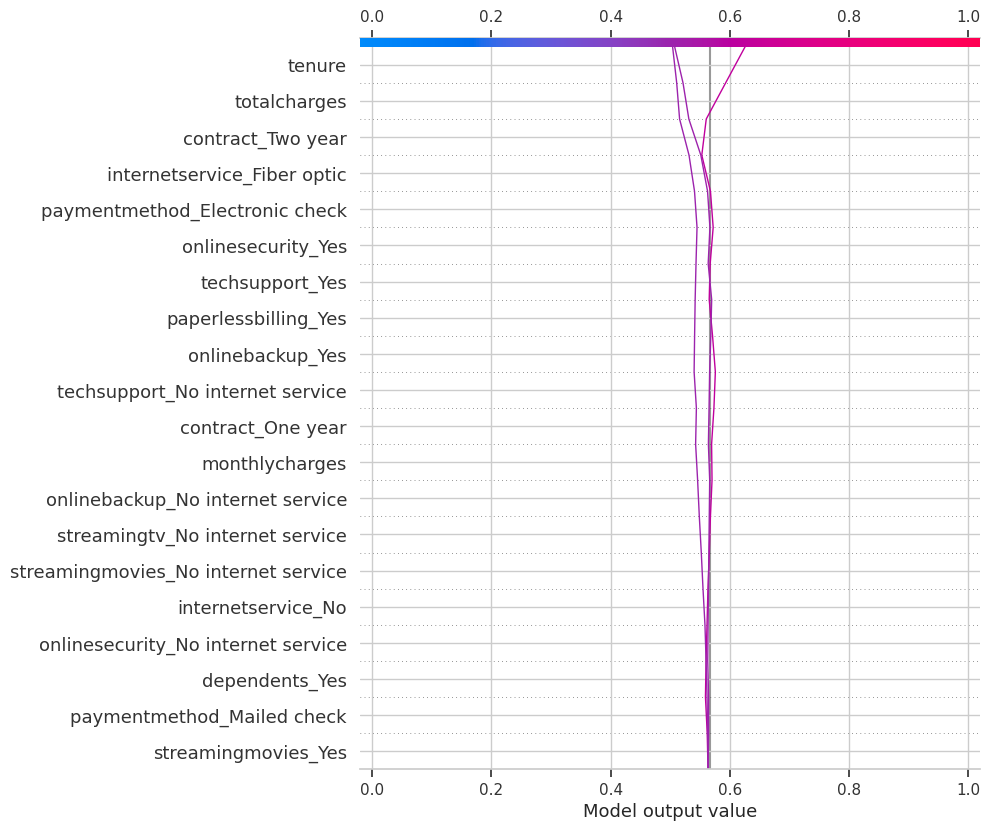

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_values[1][:3], X_test_sub, link='logit')

## ¿Que pasa si achicamos mucho el dataset de referencia?

Sabemos que achicar mucho el dataset de referencia hace que la generación de resultados sea más rapida, menos conmutaciones, menos operaciones, pero tambien menor precisión. Veremos como al agarrar variras muestras de diferente tamaño, la calidad de resultados resulta diferente.

Podremos observar que entre más grande la muestra, más presición pero tambien más lento es el proceso

In [ ]:
sample_sizes = [50, 100, 150, 200, 300, 600, 1000, 2000, 3000]
metric_holder = []

for size in sample_sizes:
    start_time = time.time()

    X_test_sub = shap.sample(X_test, 1, random_state=42)
    X_train_sub = shap.sample(X_train, size, random_state=42)

    explainer = shap.KernelExplainer(rf_fitted.predict_proba, X_train_sub)
    shap_values = explainer.shap_values(X_test_sub, l1_reg="aic")
    elapsed_time = time.time() - start_time

    metric_holder.append(
        {
            "class0 exp": explainer.expected_value[0],
            "class1 exp": explainer.expected_value[1],
            "run time": elapsed_time,
            "sample size": size,
        }
    )

metric_df = pd.DataFrame(metric_holder)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
def setup_plot():
    plt.rcParams["axes.grid.axis"] = "y"
    plt.rcParams["axes.grid"] = True
    plt.rcParams["legend.fontsize"] = 14
    plt.rc("grid", linestyle="dashed", color="lightgrey", linewidth=1)
    plt.rcParams["xtick.labelsize"] = 15
    plt.rcParams["ytick.labelsize"] = 15

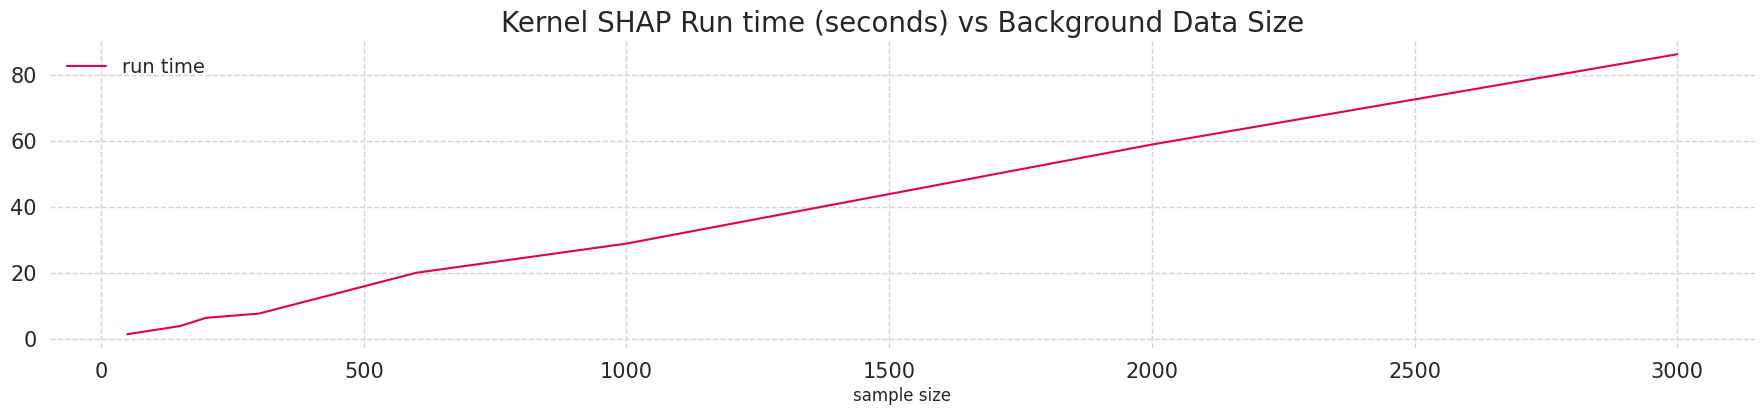

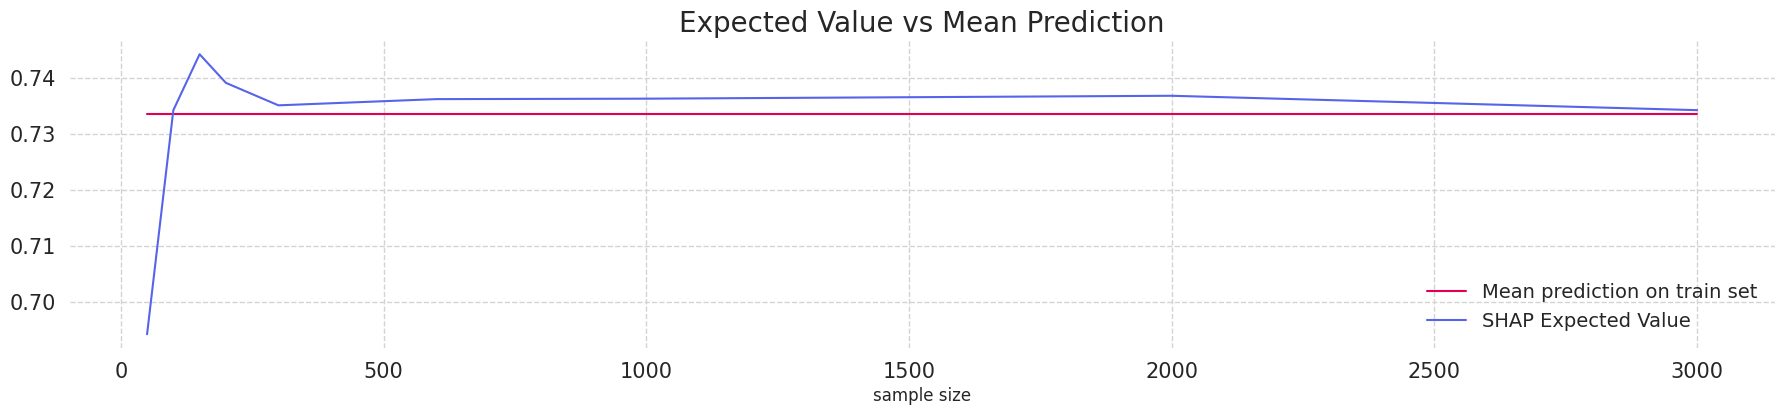

In [ ]:
mean_pred = rf_fitted.predict_proba(X_train).mean(axis=0)
metric_df["mean prediction class0"] = mean_pred[0]
metric_df["mean prediction class1"] = mean_pred[1]
metric_df.head()
setup_plot()
metrix_ax = metric_df[["sample size", "run time"]].plot(
    kind="line",
    x="sample size",
    title="Kernel SHAP Run time (seconds) vs Background Data Size",
    figsize=(22, 4),
    color = ['#e30052']
)
metrix_ax.title.set_size(20)
plt.box(False)


setup_plot()
metrix_ax = metric_df[["sample size", "mean prediction class0", "class0 exp"]].plot(
    kind="line",
    x="sample size",
    title="Expected Value vs Mean Prediction",
    figsize=(22, 4),
    color = ['#e30052', '#5564eb']
)
metrix_ax.title.set_size(20)
metrix_ax.legend(["Mean prediction on train set", "SHAP Expected Value"])
plt.box(False)